## Traveling Salesman Problem and GA

Following from: https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

In [11]:
%matplotlib notebook
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
import TravelingSalesman as TSP

In [16]:
def DetermineChange(value, generation, reset = False):
    #Makes orig function like a "static" variable and keep its value between function calls
    if 'orig' not in DetermineChange.__dict__:
        DetermineChange.orig = (value, generation)
        
    if DetermineChange.orig == None:
        DetermineChange.orig = (value, generation)
        
    proceed = True
        
    if reset:
        DetermineChange.orig = None
        
    else:
        perc = abs(DetermineChange.orig[0] - value) / DetermineChange.orig[0]

        #print(f"orig: {DetermineChange.orig}\nnew: ({value}, {generation})")
        #print(f"perc: {perc}")

        if perc < perChange and abs(DetermineChange.orig[1] - generation) >= maxFlatGens:
            proceed = False
        elif perc > perChange:
                DetermineChange.orig = (value, generation)
                
    return proceed

In [21]:
#def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
def geneticAlgorithm(population, eliteSize, mutationRate, generations):
    #pop = initialPopulation(popSize, population)
    pop = population
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [22]:
def geneticAlgorithmComparison(population, eliteSize, mutationRate, generations, childMethods, mutationMethods):
    '''  
    Narrative: Outputs the distance of the starting best route of the population and the distance of the best route at the
                end of the simulation for each combination of recombination and mutation methods specified in childMethods
                and mutationMethods.

    Parameters:
        population: A list of possible routes to take between the cities.
        eliteSize: How many of the "fittest" routes to carry over into the next generation
        mutationRate: A value between 0.0-1.0.  The likelihood of a mutation occuring in a child.
        generations: The maximum number of generations to allow the algorithm to run for.
        childMethods: A list of the recombination method(s) to use.
        mutationMethods: A list of the mutation method(s) to use.
    '''    
    pop = population
    
    for cMethod in childMethods:
        for mMethod in mutationMethods:
            print(childMethods[cMethod] + "," + mutationMethods[mMethod])
            print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
            for i in range(0, generations):
                pop = nextGeneration(pop, eliteSize, mutationRate, cMethod, mMethod)
            
            print("Final distance: " + str(1 / rankRoutes(pop)[0][1]) + "\n\n")
            pop = population
    
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [23]:
def geneticAlgorithmPlot(population, eliteSize, mutationRate, generations):
    '''  
    Narrative: Outputs the distance of the starting best route of the population and the distance of the best route at the
                end of the simulation.

    Parameters:
        population: A list of possible routes to take between the cities.
        eliteSize: How many of the "fittest" routes to carry over into the next generation
        mutationRate: A value between 0.0-1.0.  The likelihood of a mutation occuring in a child.
        generations: The maximum number of generations to allow the algorithm to run for.
    '''
    pop = population
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

In [24]:
#NOTE: Need to re-examine this function to be sure of how it works.

def geneticAlgorithmComparisonPlot(population, eliteSize, mutationRate, generations, childMethods, mutationMethods):
    '''  
    Narrative: Generates a graph with the performance of each combination of childMethods and mutationMethods for a single run.

    Parameters:
        population: A list of possible routes to take between the cities.
        eliteSize: How many of the "fittest" routes to carry over into the next generation
        mutationRate: A value between 0.0-1.0.  The likelihood of a mutation occuring in a child.
        generations: The maximum number of generations to allow the algorithm to run for.
        cMethods: A list of the recombination method(s) to use.
        mMethods: A list of the mutation method(s) to use.
        runs: The number of times to run each simulation.
    '''
    pop = population
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    label = None
    df = pd.DataFrame()
    
    for cMethod in childMethods:
        for mMethod in mutationMethods:
            label = childMethods[cMethod] + "," + mutationMethods[mMethod]
    
            #Change to while loop and add early termination condition
            for i in range(0, generations):
                pop = nextGeneration(pop, eliteSize, mutationRate, cMethod, mMethod)
                progress.append(1 / rankRoutes(pop)[0][1])
                
            df[label] = progress
            pop = population
            progress = []
            progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(df)
    plt.title(f"Pop={len(population)}, Elite Size={eliteSize}, Mutation Rate={mutationRate}, Generations={generations}")
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.legend(df, loc = "center left", bbox_to_anchor=(1, 0.5), title="Configurations")
    plt.tight_layout()
    plt.show()

In [25]:
def geneticAlgorithmVariationTest(population, eliteSize, mutationRate, generations, childMethod, mutationMethod, runs):
    '''  
    Narrative: Generates a graph with the performance of each run of the specified recombination and mutation combination.

    Parameters:
        population: A list of possible routes to take between the cities.
        eliteSize: How many of the "fittest" routes to carry over into the next generation
        mutationRate: A value between 0.0-1.0.  The likelihood of a mutation occuring in a child.
        generations: The maximum number of generations to allow the algorithm to run for.
        childMethod: The recombination method to use.
        mutationMethod: The mutation method to use.
        runs: How many times to run the simulation.
    '''
    pop = population
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    label = None
    tmpDF = pd.DataFrame()
    df = pd.DataFrame()
    dfErr = pd.DataFrame()
    j = 0
    
    for i in range(runs):
        label = f"Run {i}"
    
        while(j < generations and DetermineChange(progress[j], j)):
            pop = nextGeneration(pop, eliteSize, mutationRate, childMethod, mutationMethod)
            progress.append(1 / rankRoutes(pop)[0][1])
            j += 1
            
        DetermineChange(999, 999, True)
                
        tmpDF[label] = progress
        df = pd.concat([df, tmpDF], axis = 1)
        
        tmpDF = pd.DataFrame()
        pop = population
        progress = []
        progress.append(1 / rankRoutes(pop)[0][1])
        j = 0
    
    plt.plot(df)
    plt.title(f"""{childMethods[childMethod]} and {mutationMethods[mutationMethod]}\n
                Pop={len(population)}, Elite Size={eliteSize}, Mutation Rate={mutationRate}, Generations={generations}""")
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.legend(df, loc = "center left", bbox_to_anchor=(1, 0.5), title="Runs")
    plt.tight_layout()
    plt.show()

In [20]:
def GenerateTitle(cMethods, mMethods, runs):
    title = ""
    
    for cMethod in range(len(cMethods)):
        if cMethod == 0:
            title = title + TSP.childMethods[cMethods[cMethod]]
        elif cMethod < len(cMethods) - 1:
            title = title + ", " + TSP.childMethods[cMethods[cMethod]]
        else:
            title = title + " and " + TSP.childMethods[cMethods[cMethod]]
            
    title = title + " with "
    
    for mMethod in range(len(mMethods)):
        if mMethod == 0:
            title = title + TSP.mutationMethods[mMethods[mMethod]]
        elif mMethod < len(mMethods) - 1:
            title = title + ", " + TSP.mutationMethods[mMethods[mMethod]]
        else:
            title = title + " and " + TSP.mutationMethods[mMethods[mMethod]]
               
    title = title + f" Mutation. Average of {runs} Runs"
    
    return title

In [24]:
def geneticAlgorithmPerformanceTest(population, eliteSize, mutationRate, generations, cMethods, mMethods, runs):
    '''  
    Narrative: Generates a graph with the average performance of each combination of cMethods and mMethods over the
                specified number of runs with their variation.

    Parameters:
        population: A list of possible routes to take between the cities.
        eliteSize: How many of the "fittest" routes to carry over into the next generation
        mutationRate: A value between 0.0-1.0.  The likelihood of a mutation occuring in a child.
        generations: The maximum number of generations to allow the algorithm to run for.
        cMethods: A list of the recombination method(s) to use.
        mMethods: A list of the mutation method(s) to use.
        runs: The number of times to run each simulation.
    '''
    pop = population
    progress = [] 
    progress.append(1 / TSP.rankRoutes(pop)[0][1])
    
    label = None
    colTitle = None
    pltTitle = GenerateTitle(cMethods = cMethods, mMethods = mMethods, runs = runs)
    
    tmpDF = pd.DataFrame()
    df = pd.DataFrame()
    variation = pd.DataFrame()
    means = pd.DataFrame()
    var = None
    mean = None
    j = 0
    
    for childMethod in cMethods:
        for mutationMethod in mMethods:
            colTitle = TSP.childMethods[childMethod] + ", " + TSP.mutationMethods[mutationMethod]
            for i in range(runs):
                label = f"Run {i}"

                while(j < generations and DetermineChange(progress[j], j)):
                    pop = TSP.nextGeneration(pop, eliteSize, mutationRate, childMethod, mutationMethod)
                    progress.append(1 / TSP.rankRoutes(pop)[0][1])
                    j += 1

                DetermineChange(999, 999, True)

                tmpDF[label] = progress
                df = pd.concat([df, tmpDF], axis = 1)

                tmpDF = pd.DataFrame()
                pop = population
                progress = []
                progress.append(1 / TSP.rankRoutes(pop)[0][1])
                j = 0
    
            #var = df.std(axis = 1) / np.sqrt(len(df.columns) - df.isnull().sum(axis=1))  #Std. Error
            var = df.std(axis = 1)
            mean = df.mean(axis = 1)
            
            df = pd.DataFrame()
            
            tmpDF[colTitle] = var
            variation = pd.concat([variation, tmpDF], axis = 1)
            
            tmpDF = pd.DataFrame()
            tmpDF[colTitle] = mean
            means = pd.concat([means, tmpDF], axis = 1)
            
            tmpDF = pd.DataFrame()
    
    plt.plot(means)
    plt.title(f"""{pltTitle}\n
                Pop={len(population)}, Elite Size={eliteSize}, Mutation Rate={mutationRate}, Generations={generations}""")
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.legend(means, loc = "upper right", title="Combinations")
    
    for column in means:
        plt.fill_between(means.index, means[column] - variation[column], means[column] + variation[column], alpha = 0.2)
    
    plt.tight_layout()
    plt.show()

In [8]:
cityList = [] #Stores all the generated cities

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [9]:
#These are passed into the different genetic algorithm functions.

popSize = 100 #How large of a population to generate
eSize = 20 #The number of "fittest" individuals to carry over into the next generation
mRate = 0.05 #Should be between 0.0-1.0. Likelihood of a mutation occurring in a child.
gens = 500 #How many generations to run the simulation for.

#These will terminate a simulation early if the population becomes stagnant over X amount of generations.
perChange = 0.05 #How much change should occur in the fitness of the best route of a generation to continue the simulation.
maxFlatGens = 50 #How many generations can pass without change greater than or equal to perChange occurring.

In [35]:
childMethods = {0:"PMX", 1:"EX", 2:"OX"}
mutationMethods = {0:"No", 1:"Swap", 2:"Inversion"}

In [13]:
#Generate a population for testing
pop = TSP.initialPopulation(popSize = popSize, cityList = cityList)

<IPython.core.display.Javascript object>


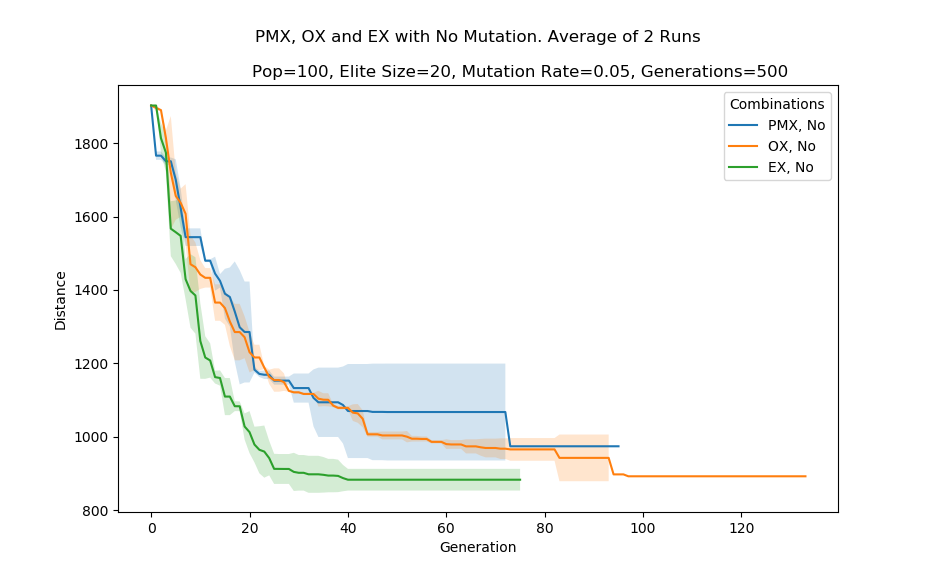

In [27]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [0, 2,  1], mMethods = [0], runs = 2)

<IPython.core.display.Javascript object>


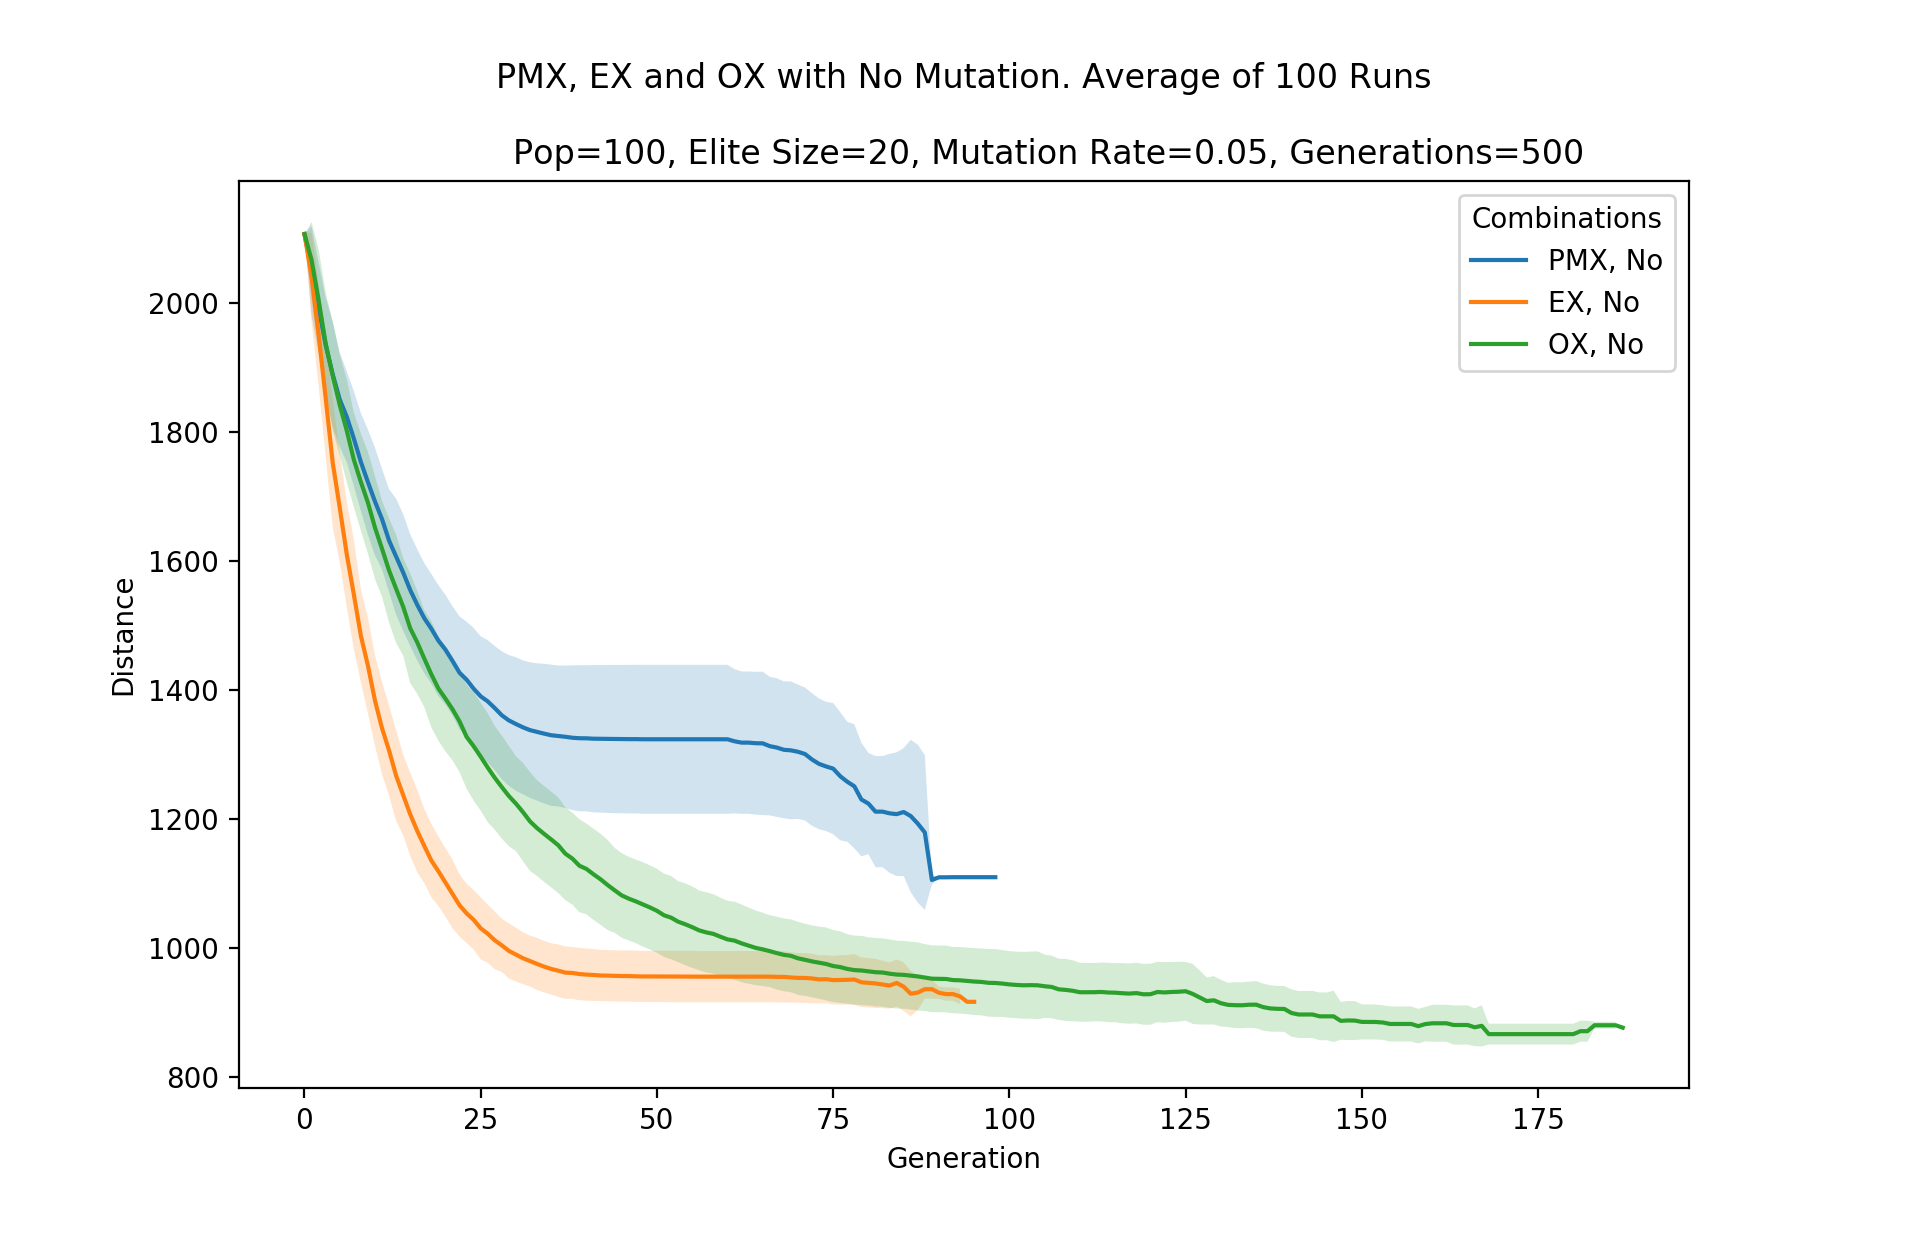

In [38]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [0,1,2], mMethods = [0], runs = 100)

<IPython.core.display.Javascript object>


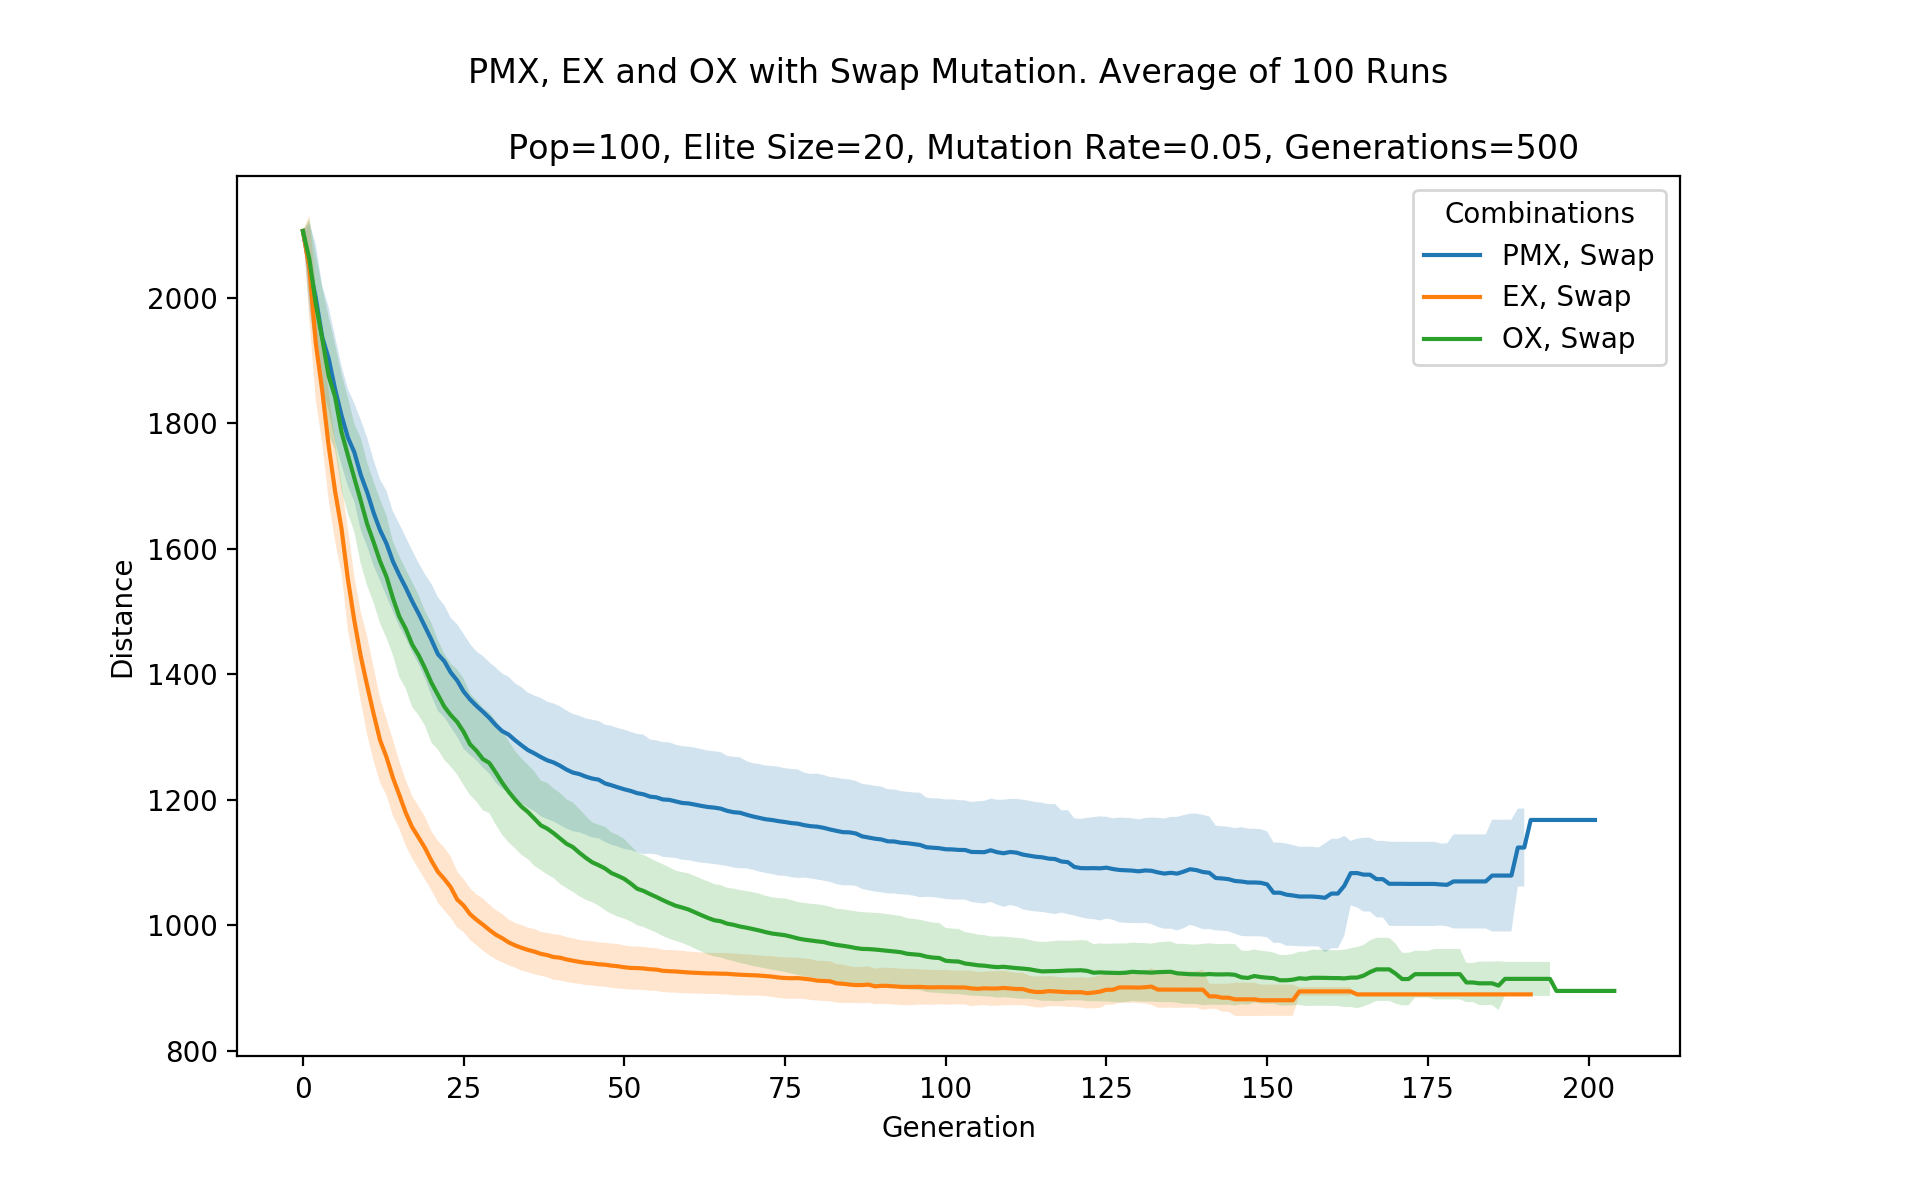

In [39]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [0,1,2], mMethods = [1], runs = 100)

<IPython.core.display.Javascript object>


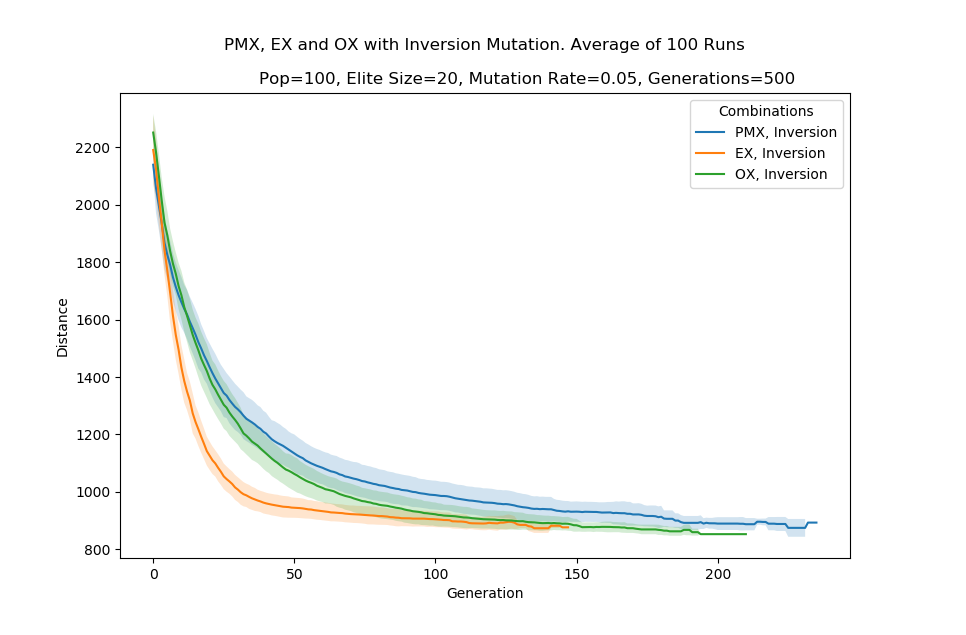

In [40]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [0,1,2], mMethods = [2], runs = 100)

<IPython.core.display.Javascript object>


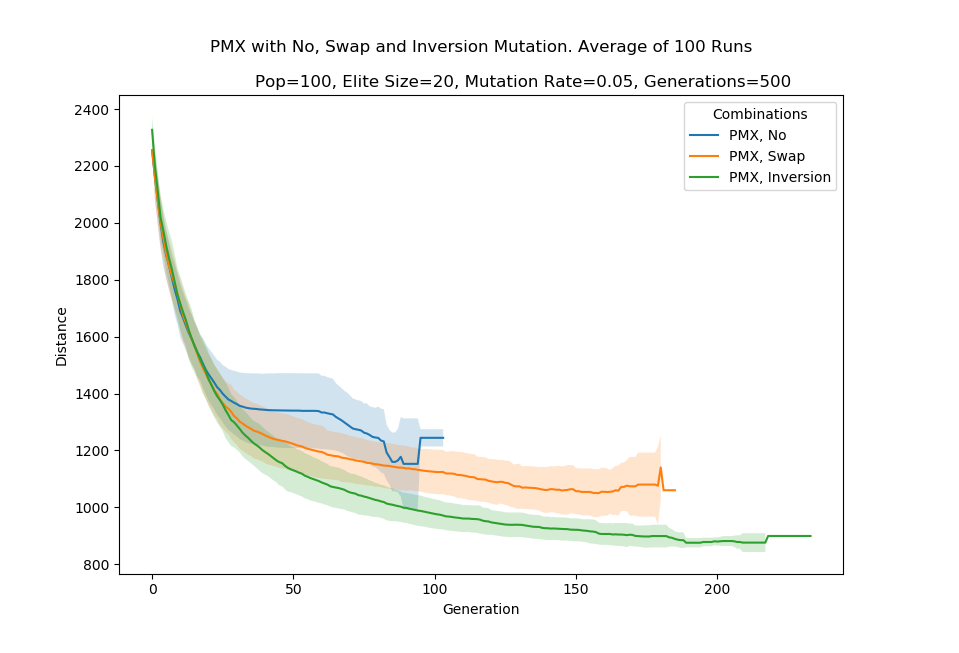

In [41]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [0], mMethods = [0, 1, 2], runs = 100)

<IPython.core.display.Javascript object>


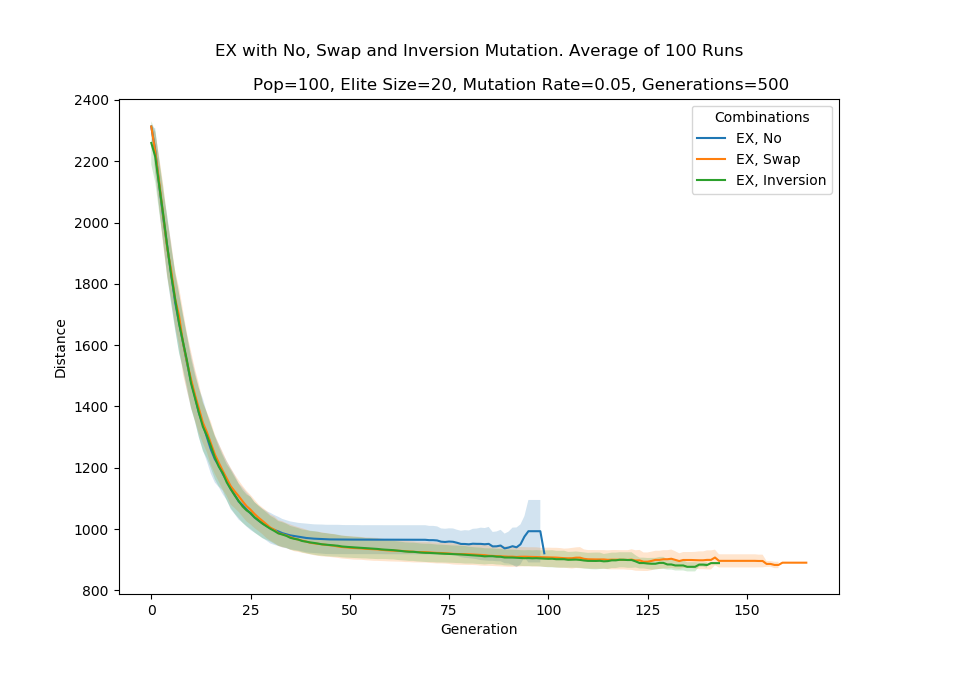

In [42]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [1], mMethods = [0, 1, 2], runs = 100)

<IPython.core.display.Javascript object>


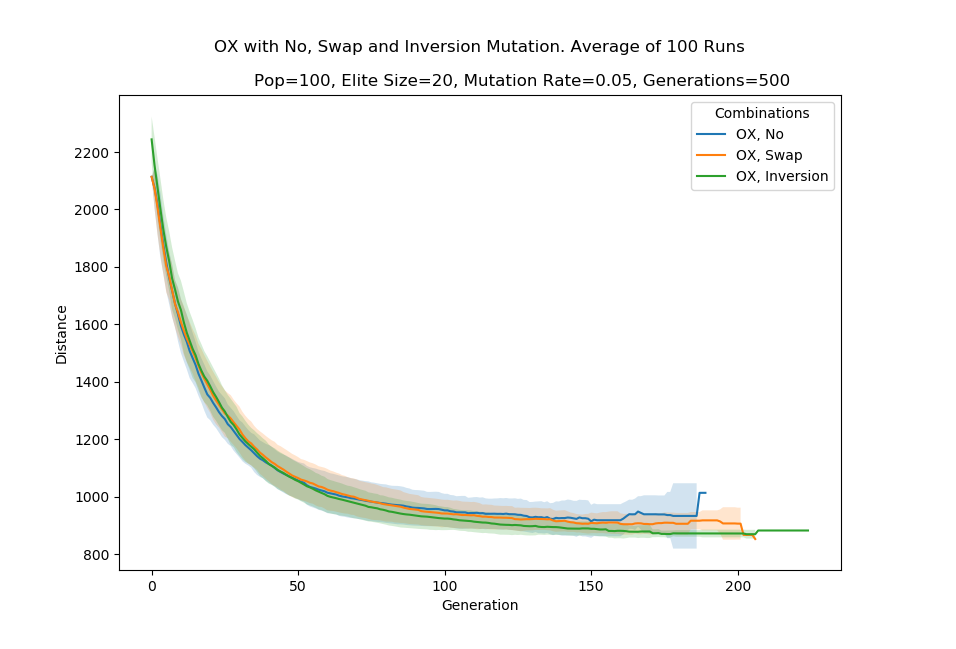

In [43]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, cMethods = [2], mMethods = [0, 1, 2], runs = 100)

<IPython.core.display.Javascript object>


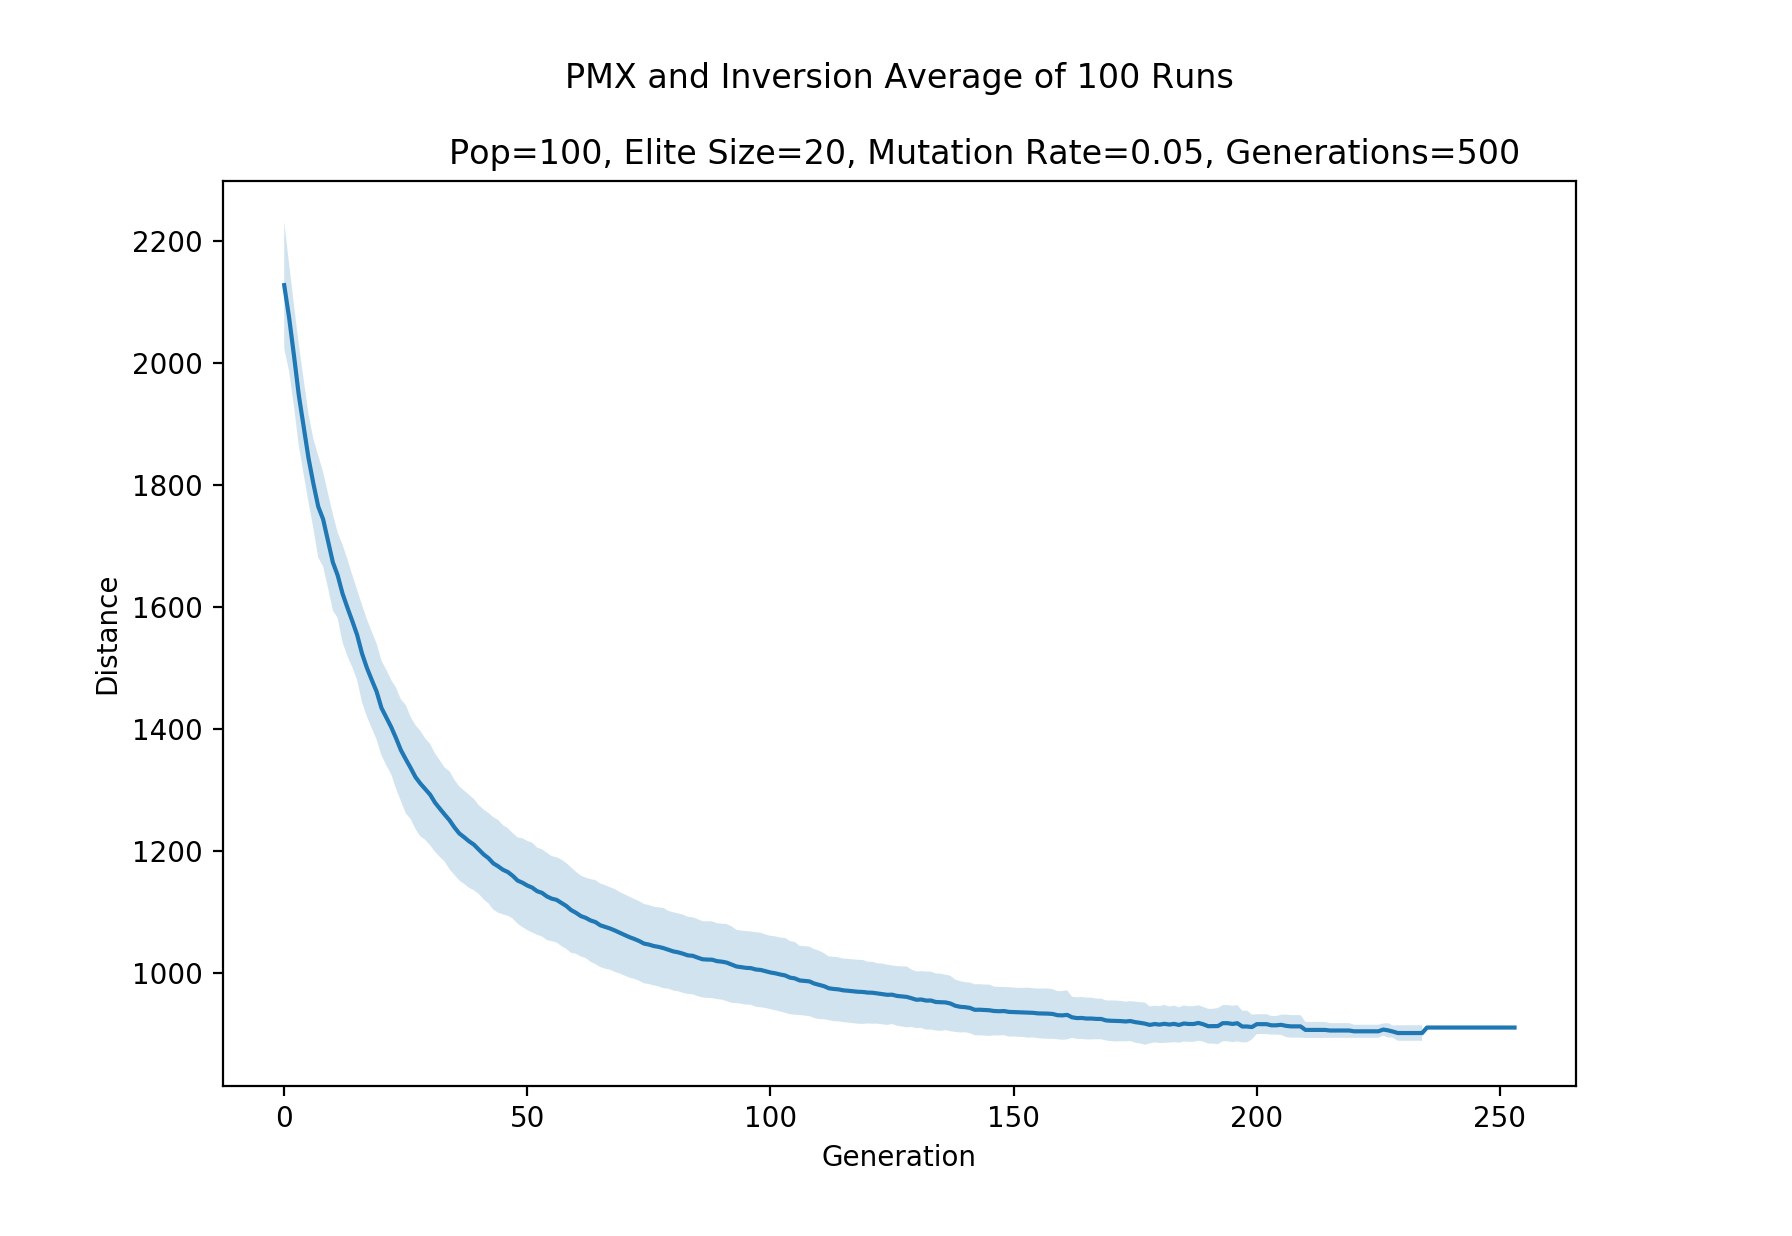

In [96]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 0, mutationMethod = 2, runs = 100)

<IPython.core.display.Javascript object>


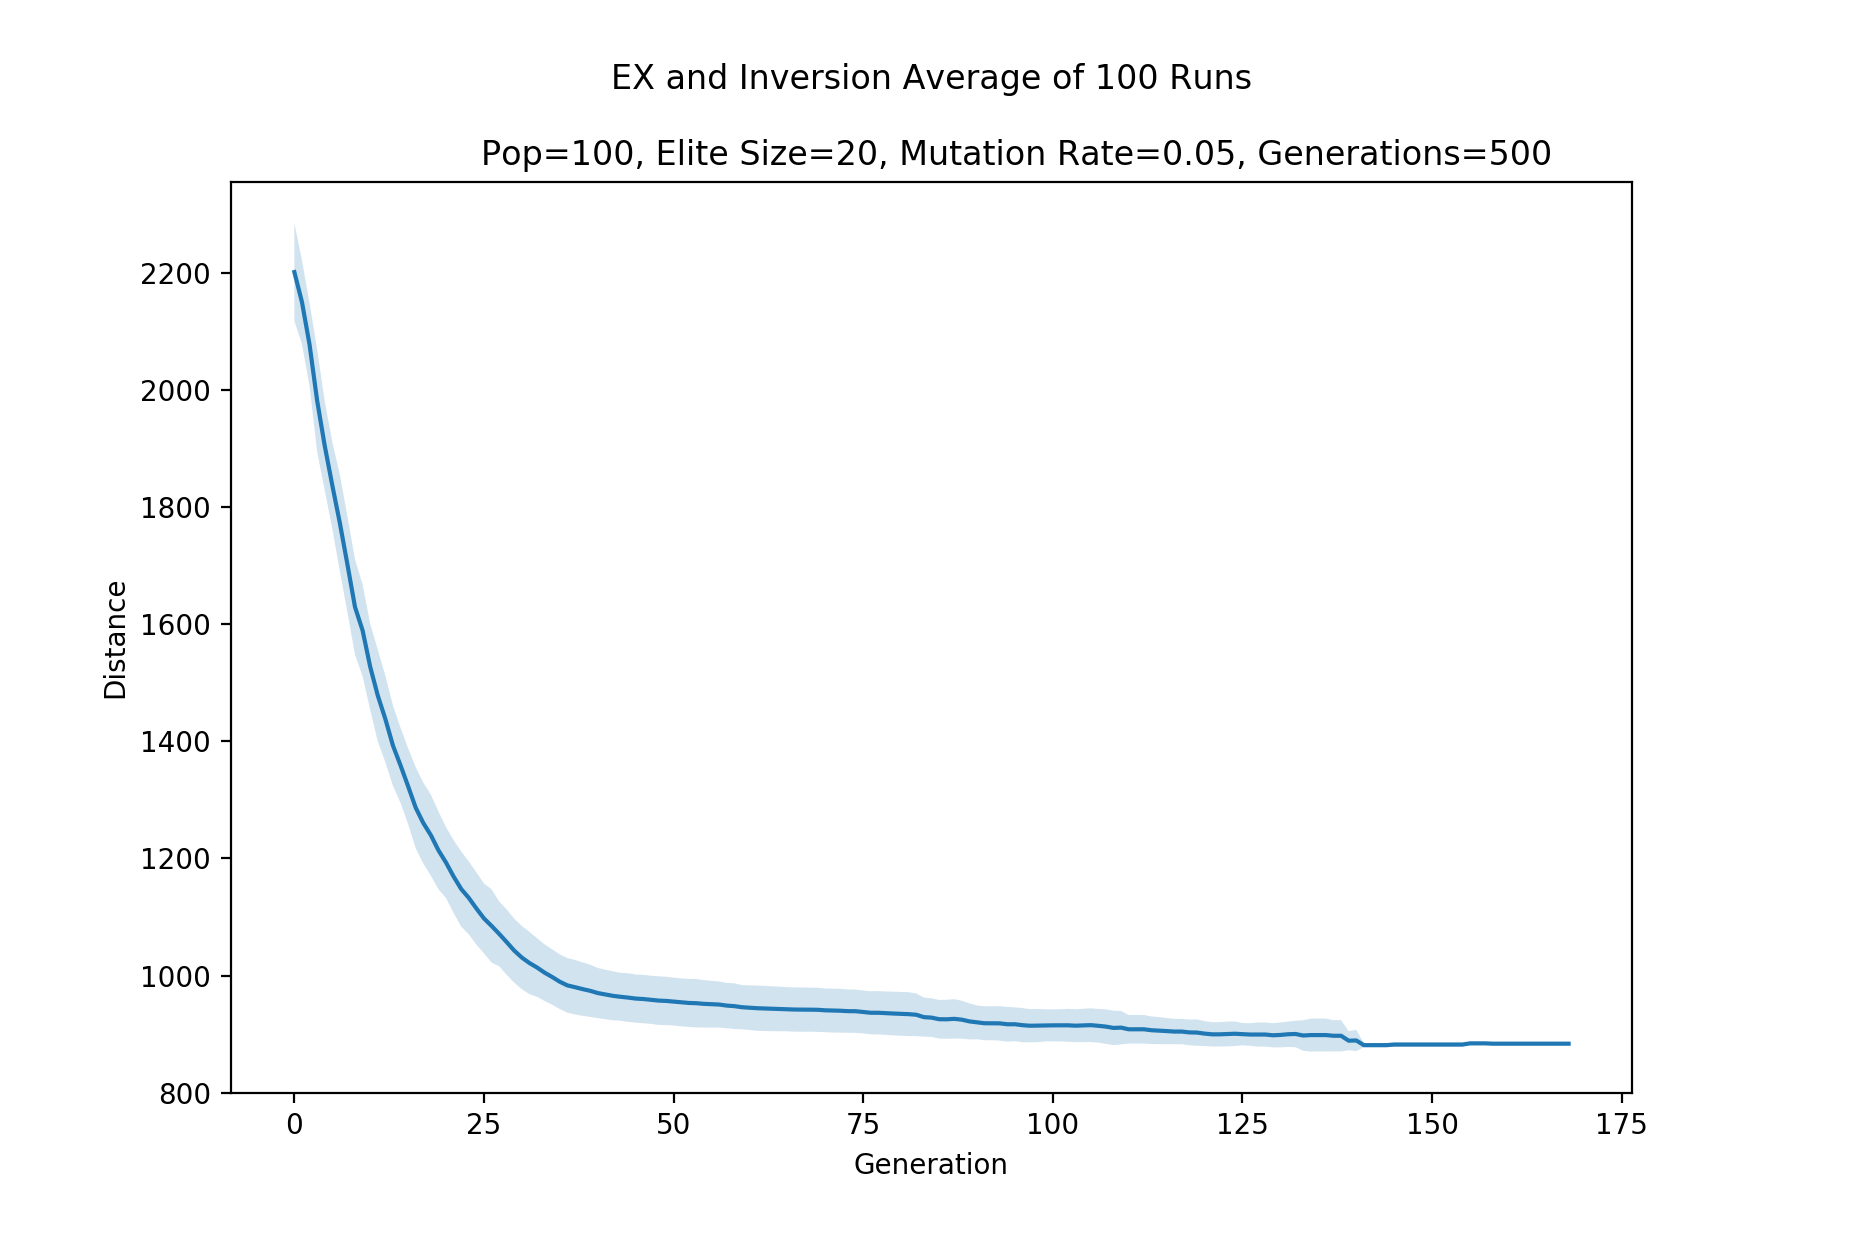

In [97]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 2, runs = 100)

<IPython.core.display.Javascript object>


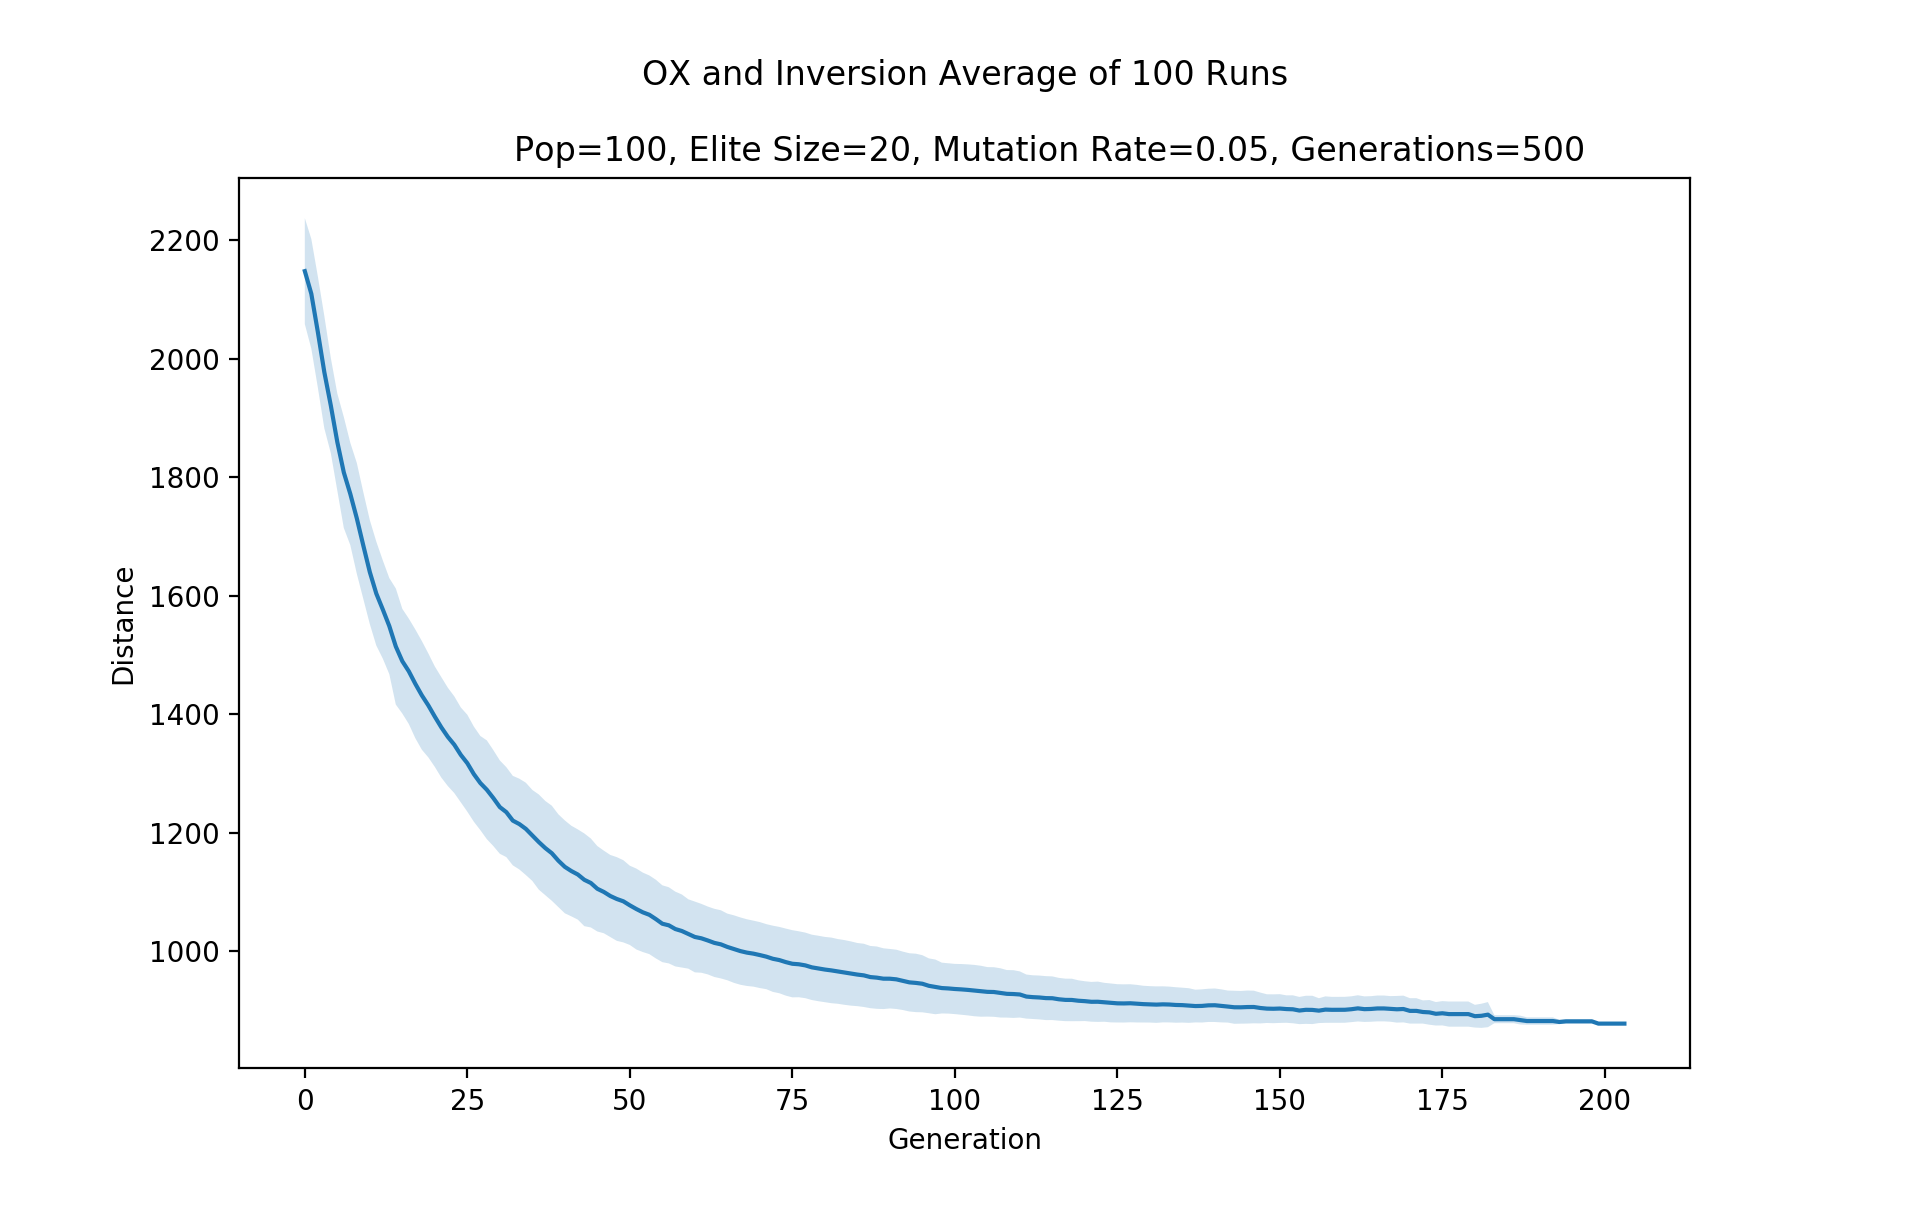

In [98]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 2, runs = 100)

In [100]:
#The orange one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 2, runs = 100)

In [101]:
#The green one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 2, runs = 100)

<IPython.core.display.Javascript object>


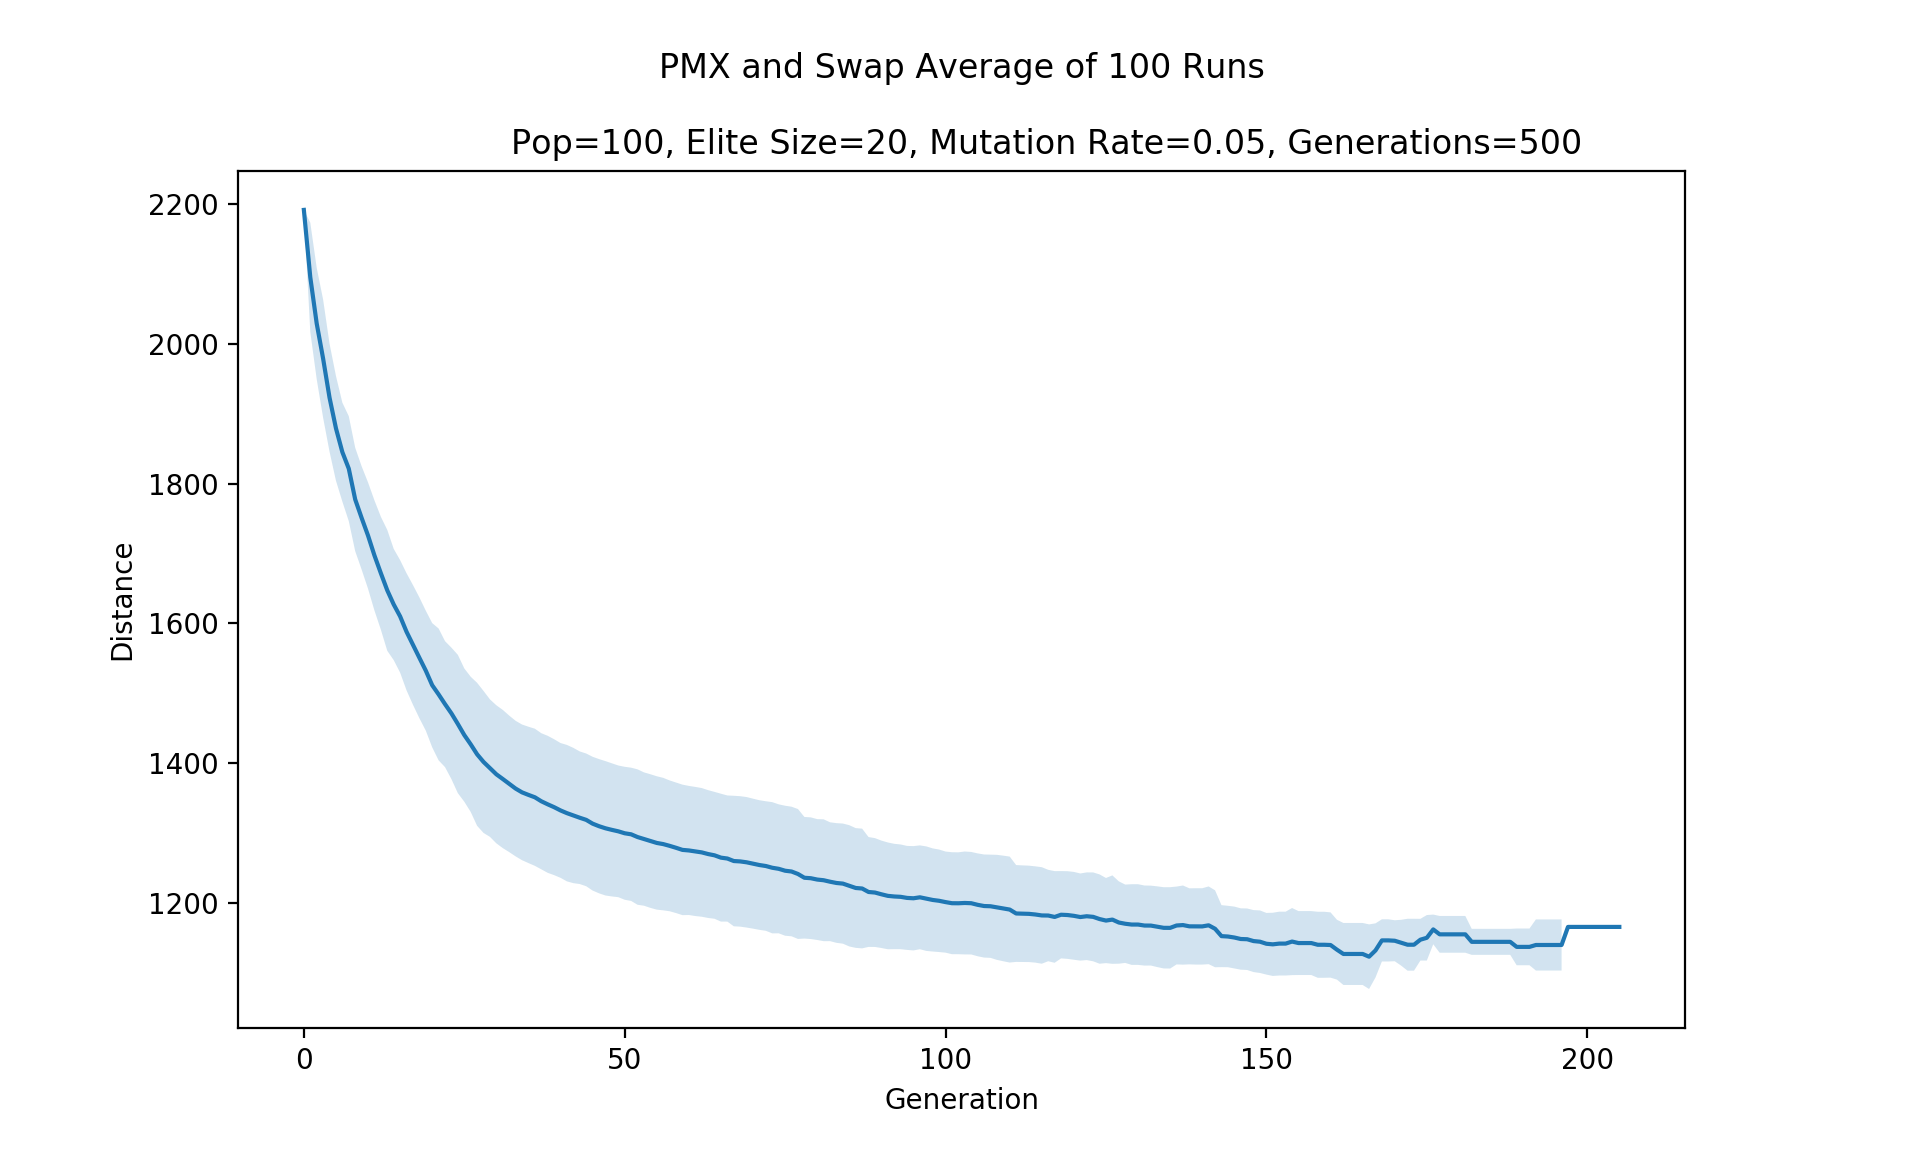

In [34]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 0, mutationMethod = 1, runs = 100)

<IPython.core.display.Javascript object>


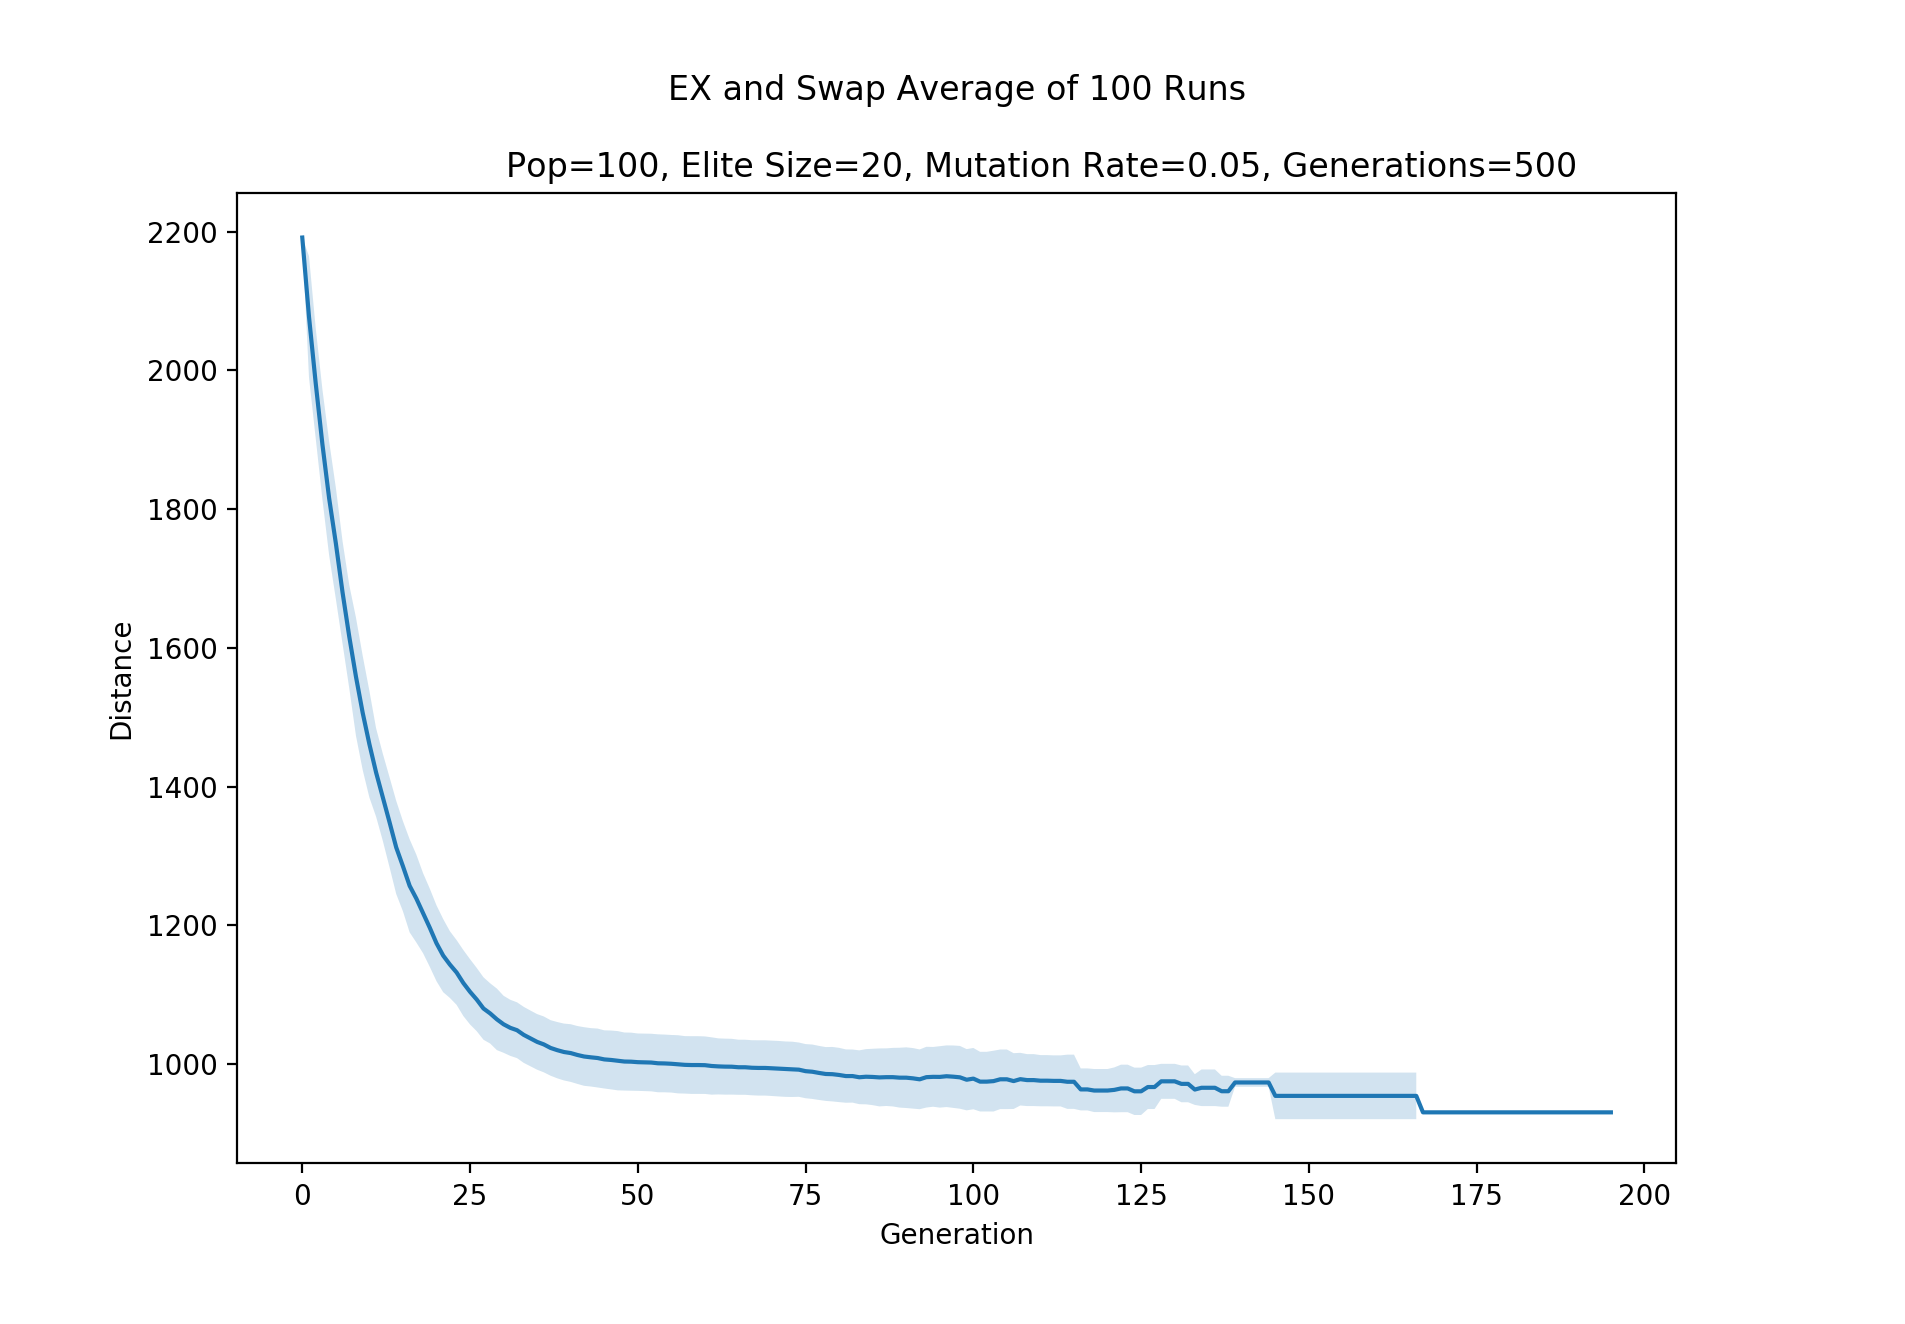

In [35]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 1, runs = 100)

<IPython.core.display.Javascript object>


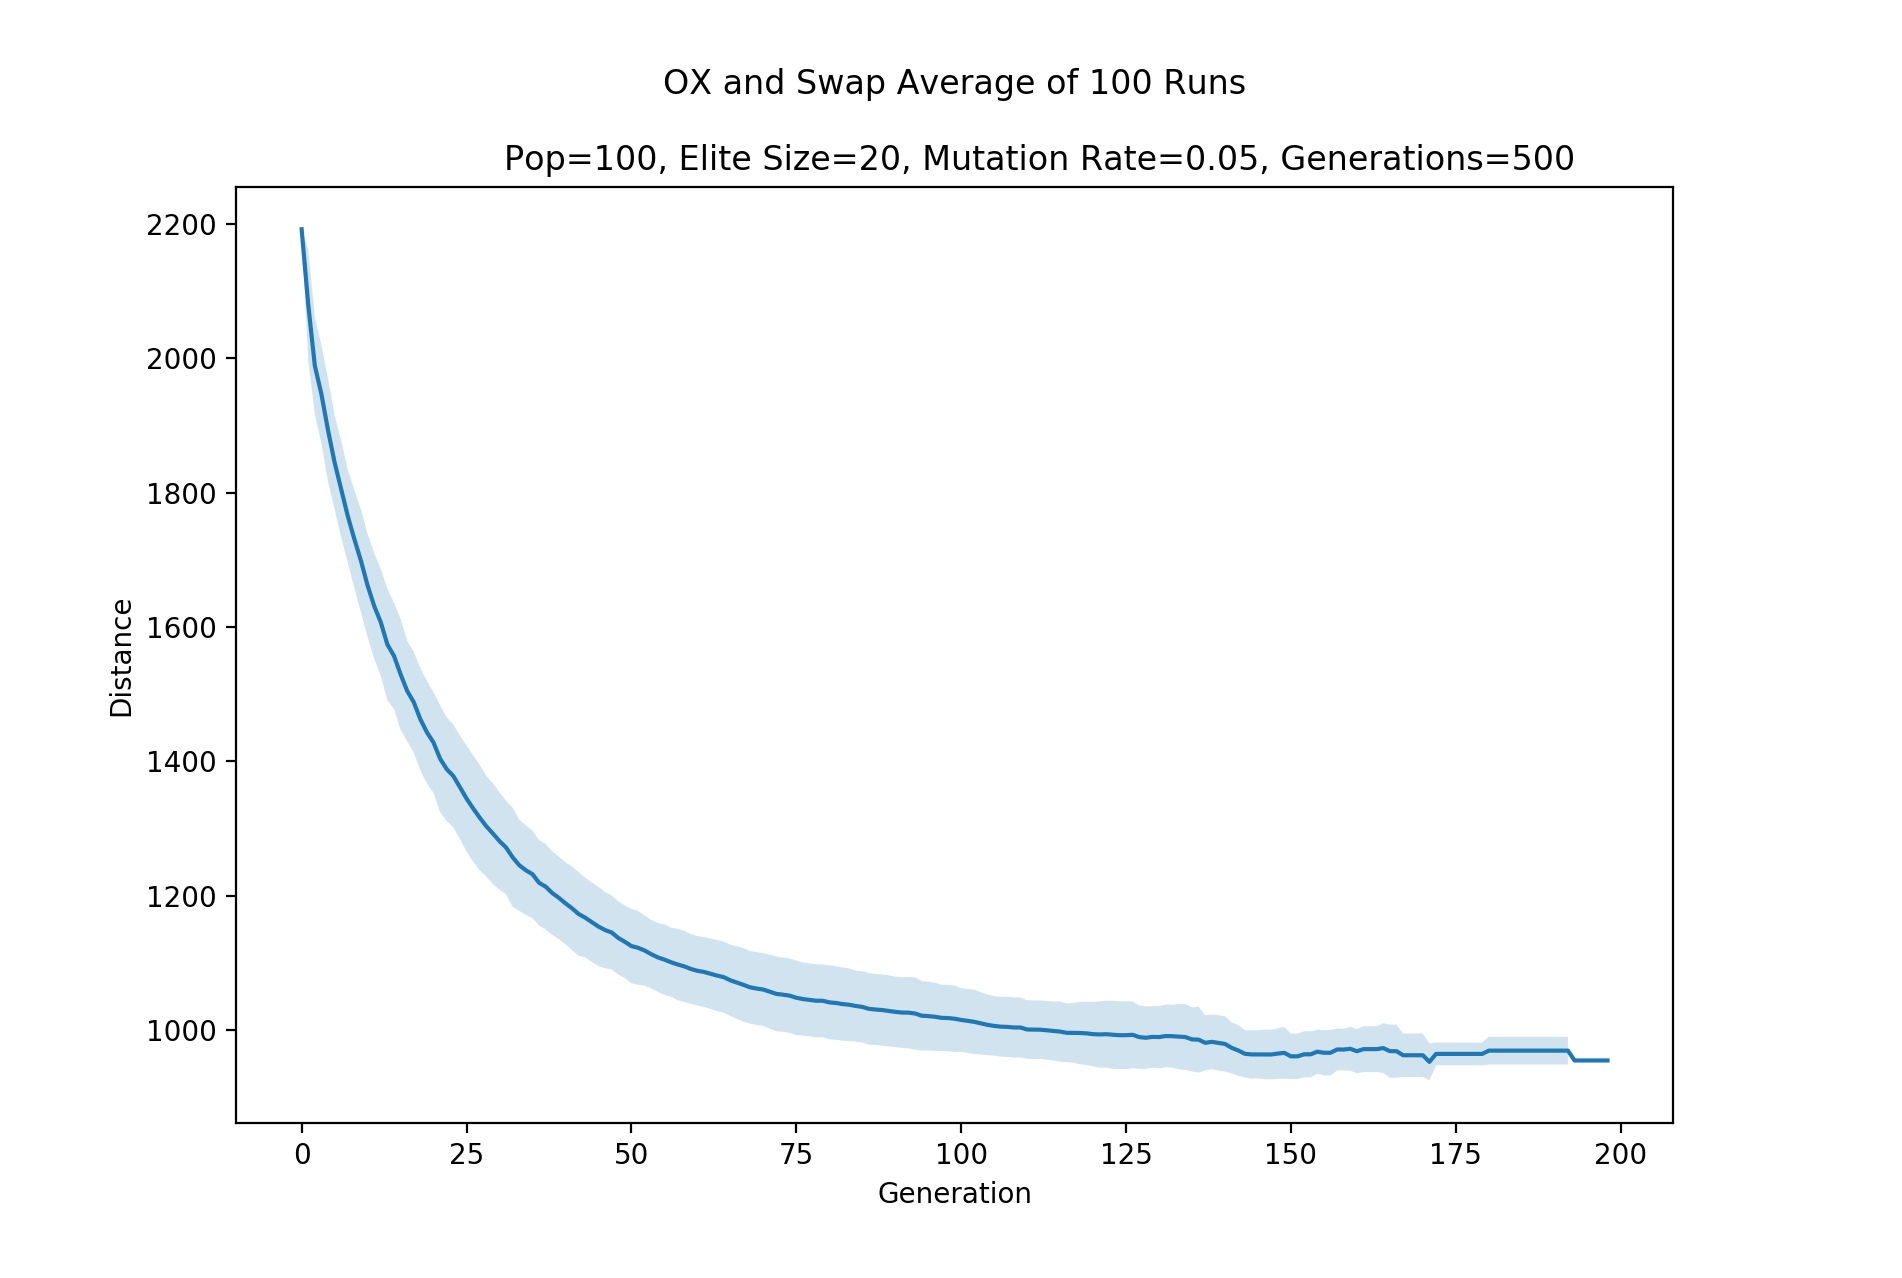

In [36]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 1, runs = 100)

<IPython.core.display.Javascript object>


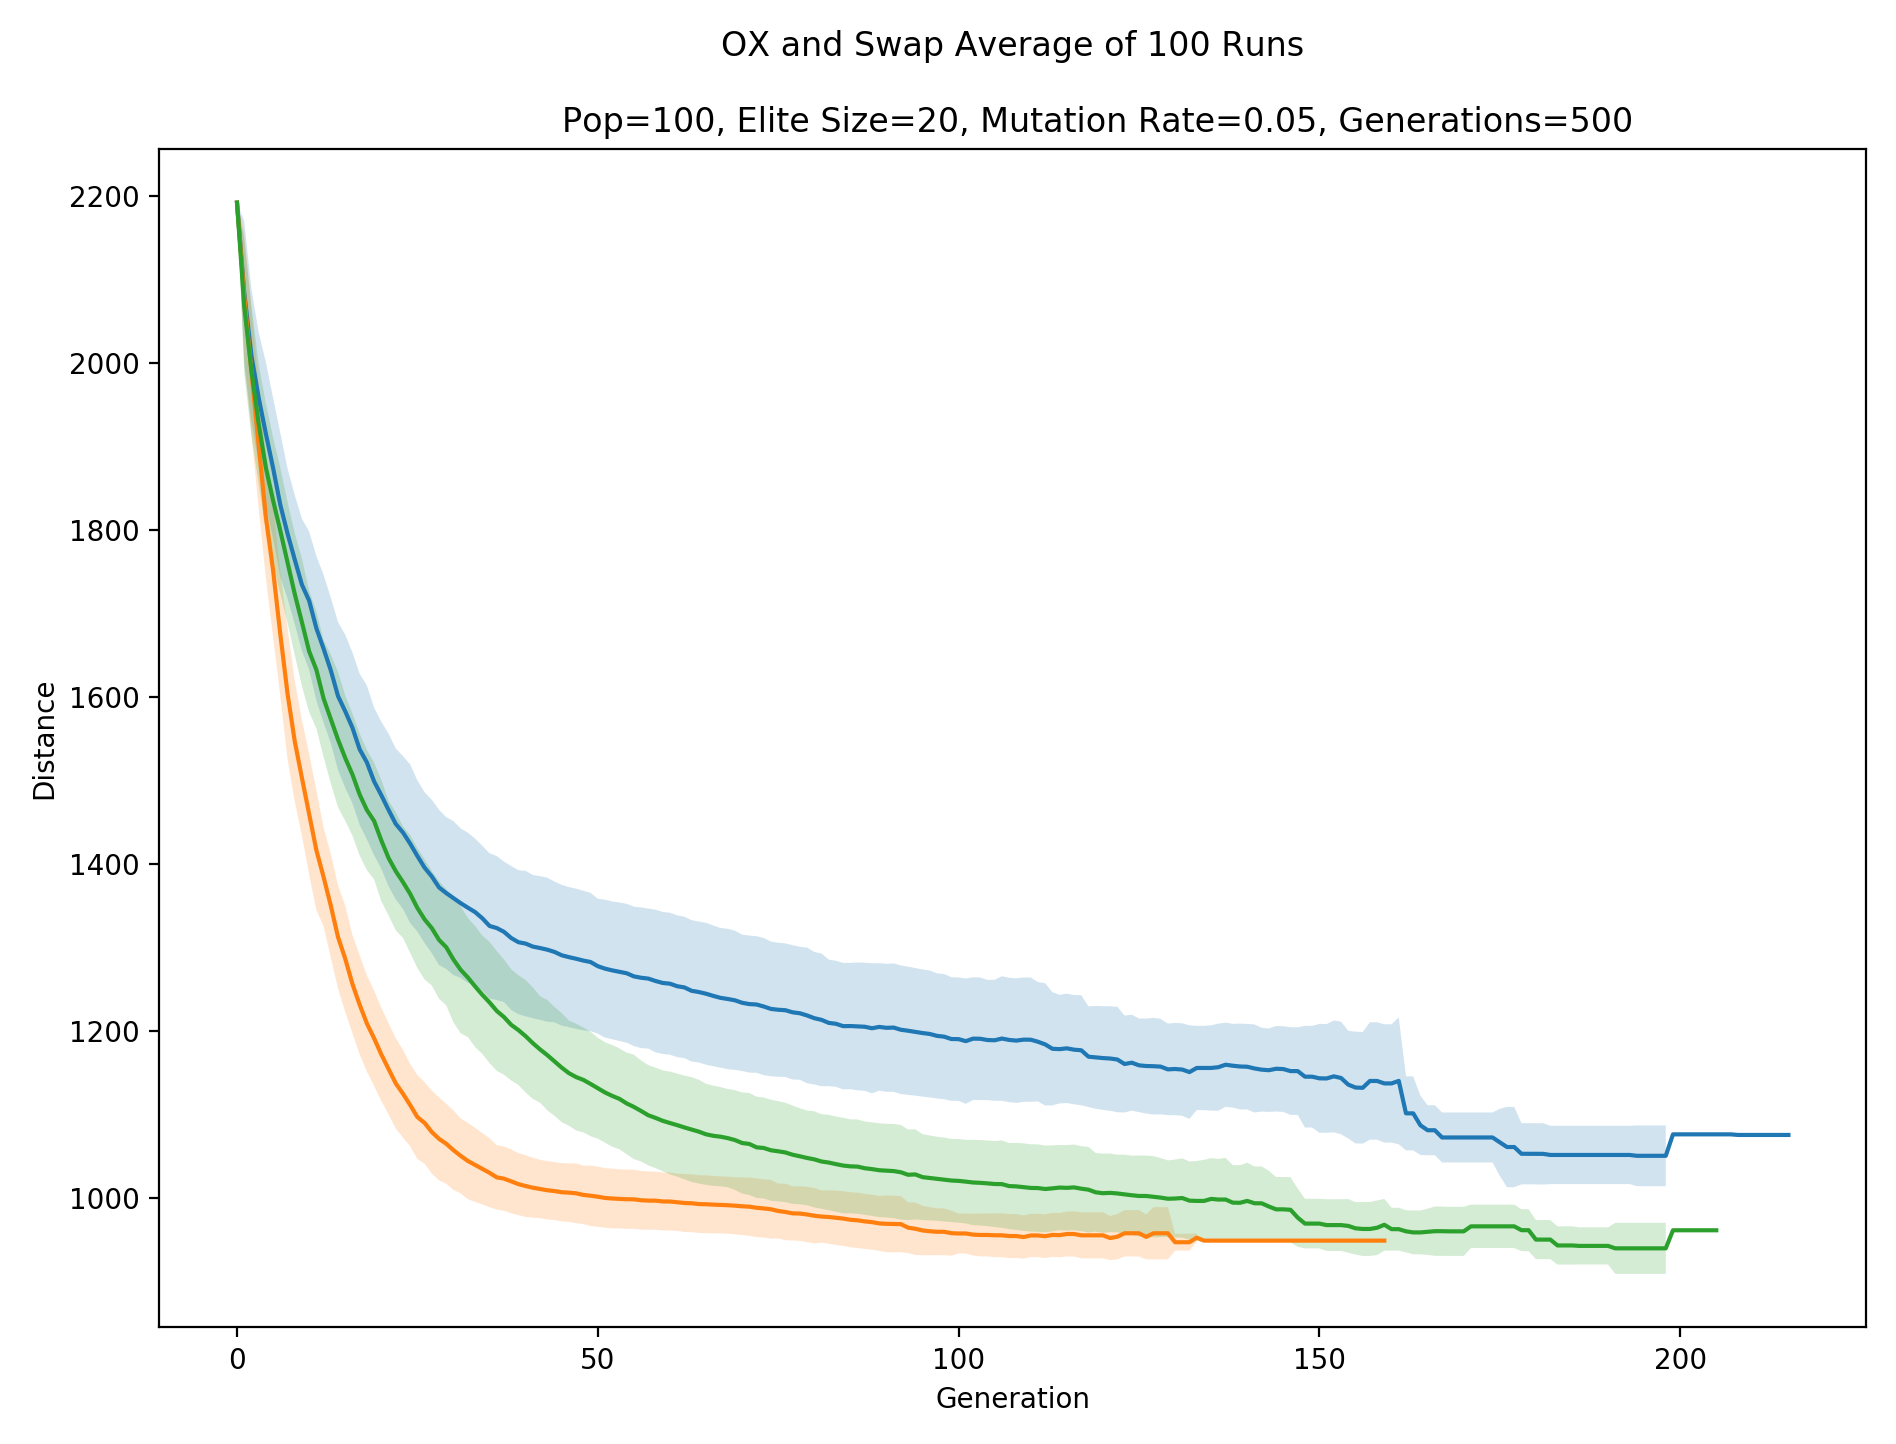

In [39]:
#PMX - blue one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 0, mutationMethod = 1, runs = 100)

In [40]:
#EX - Orange one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 1, runs = 100)

In [41]:
#OX - Green one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 1, runs = 100)

<IPython.core.display.Javascript object>


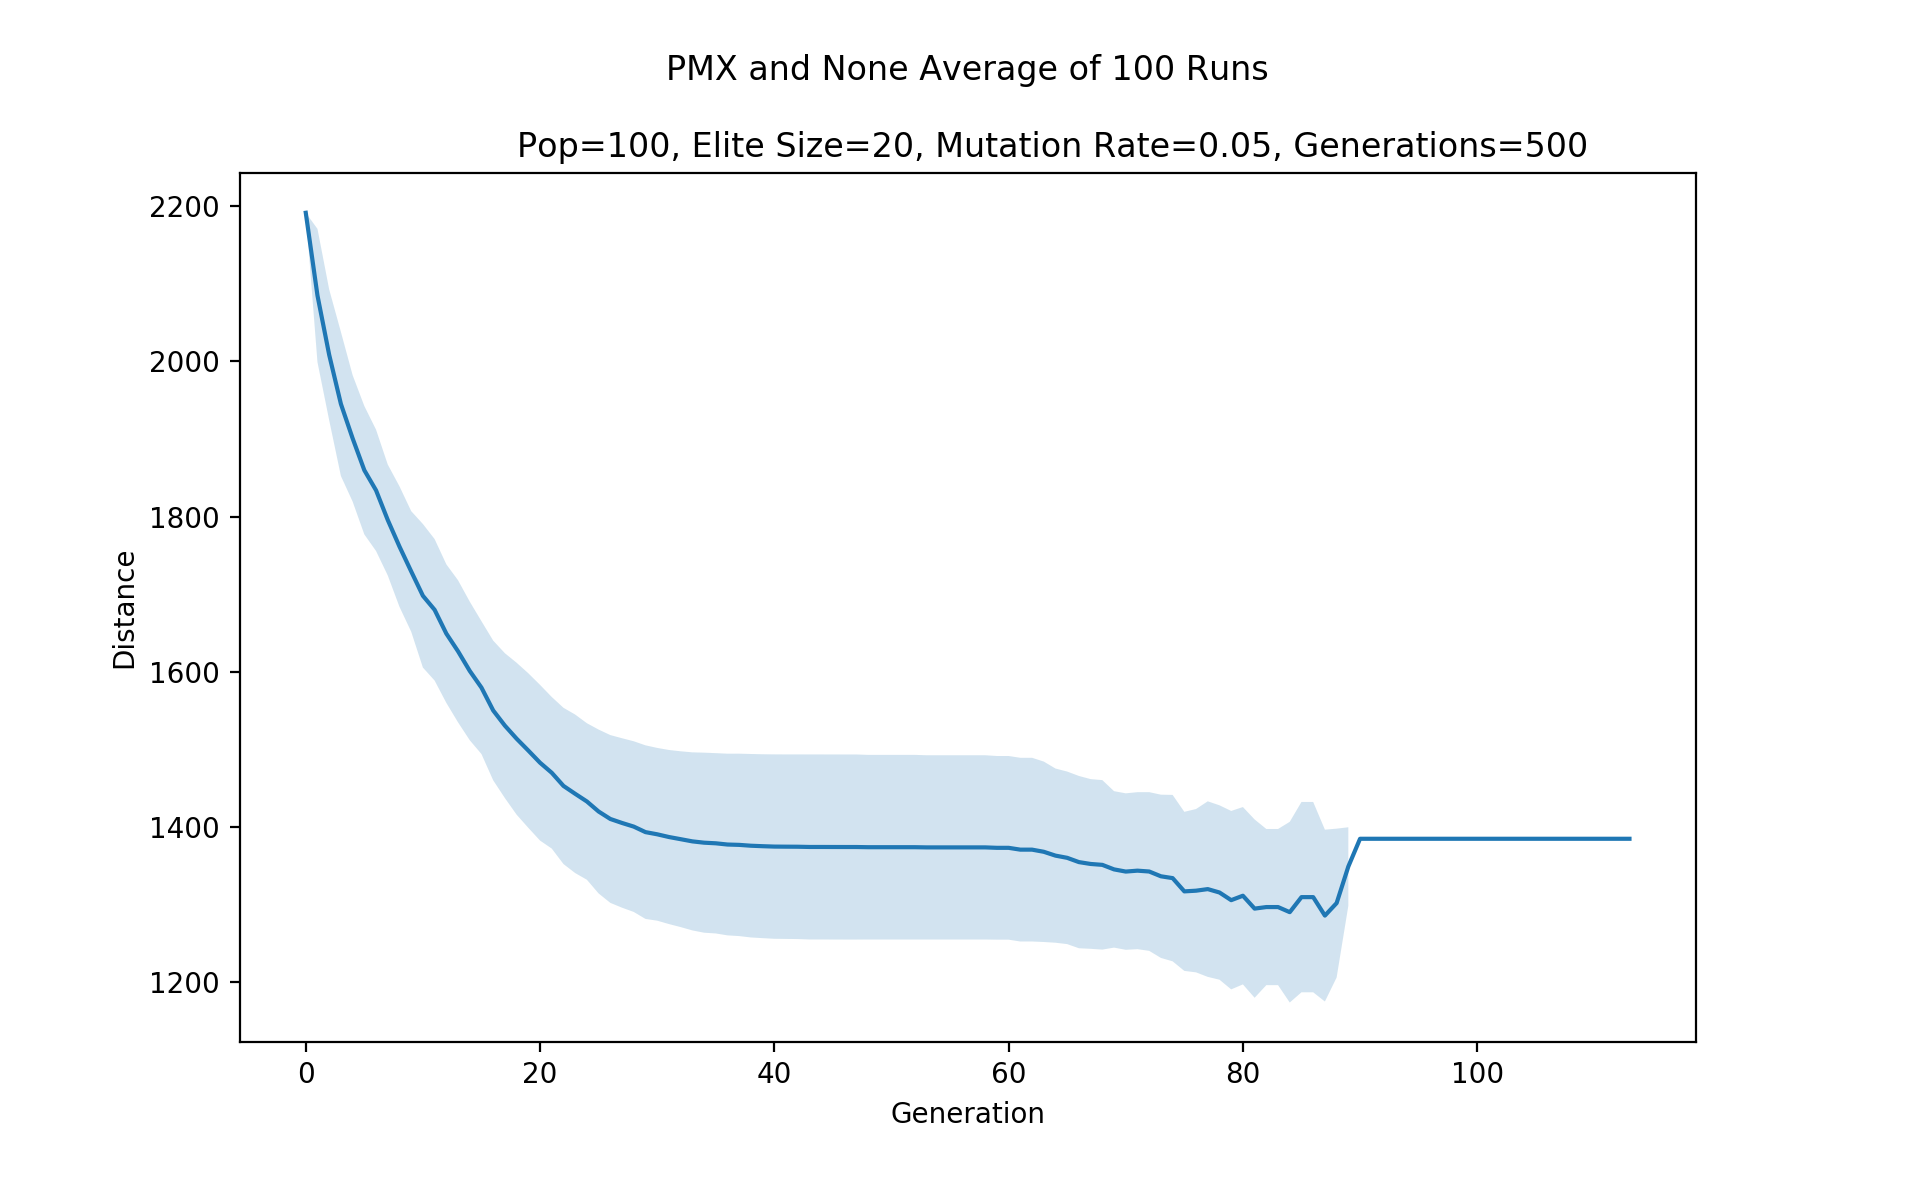

In [42]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 0, mutationMethod = 0, runs = 100)

<IPython.core.display.Javascript object>


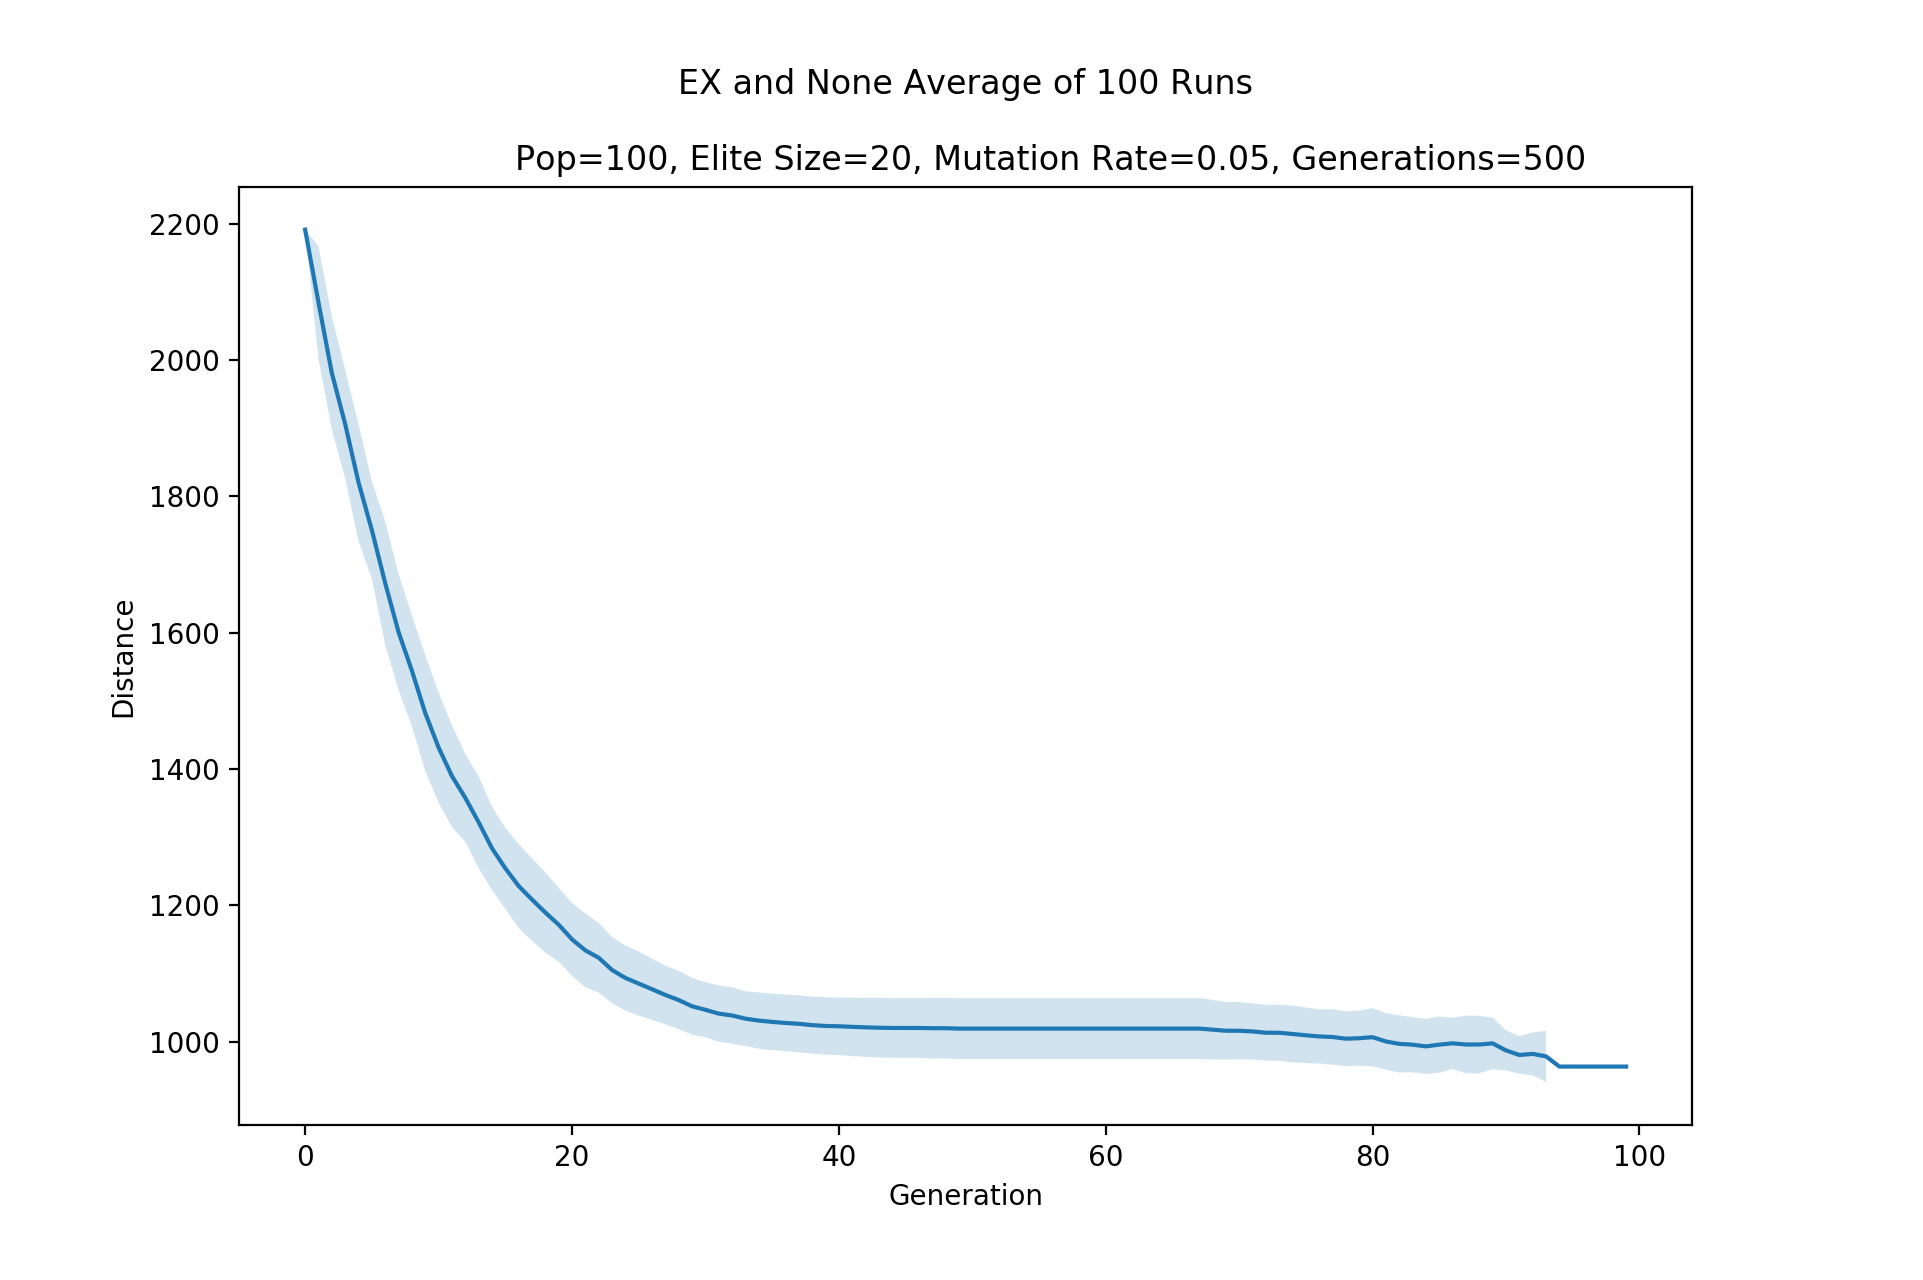

In [43]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 0, runs = 100)

<IPython.core.display.Javascript object>


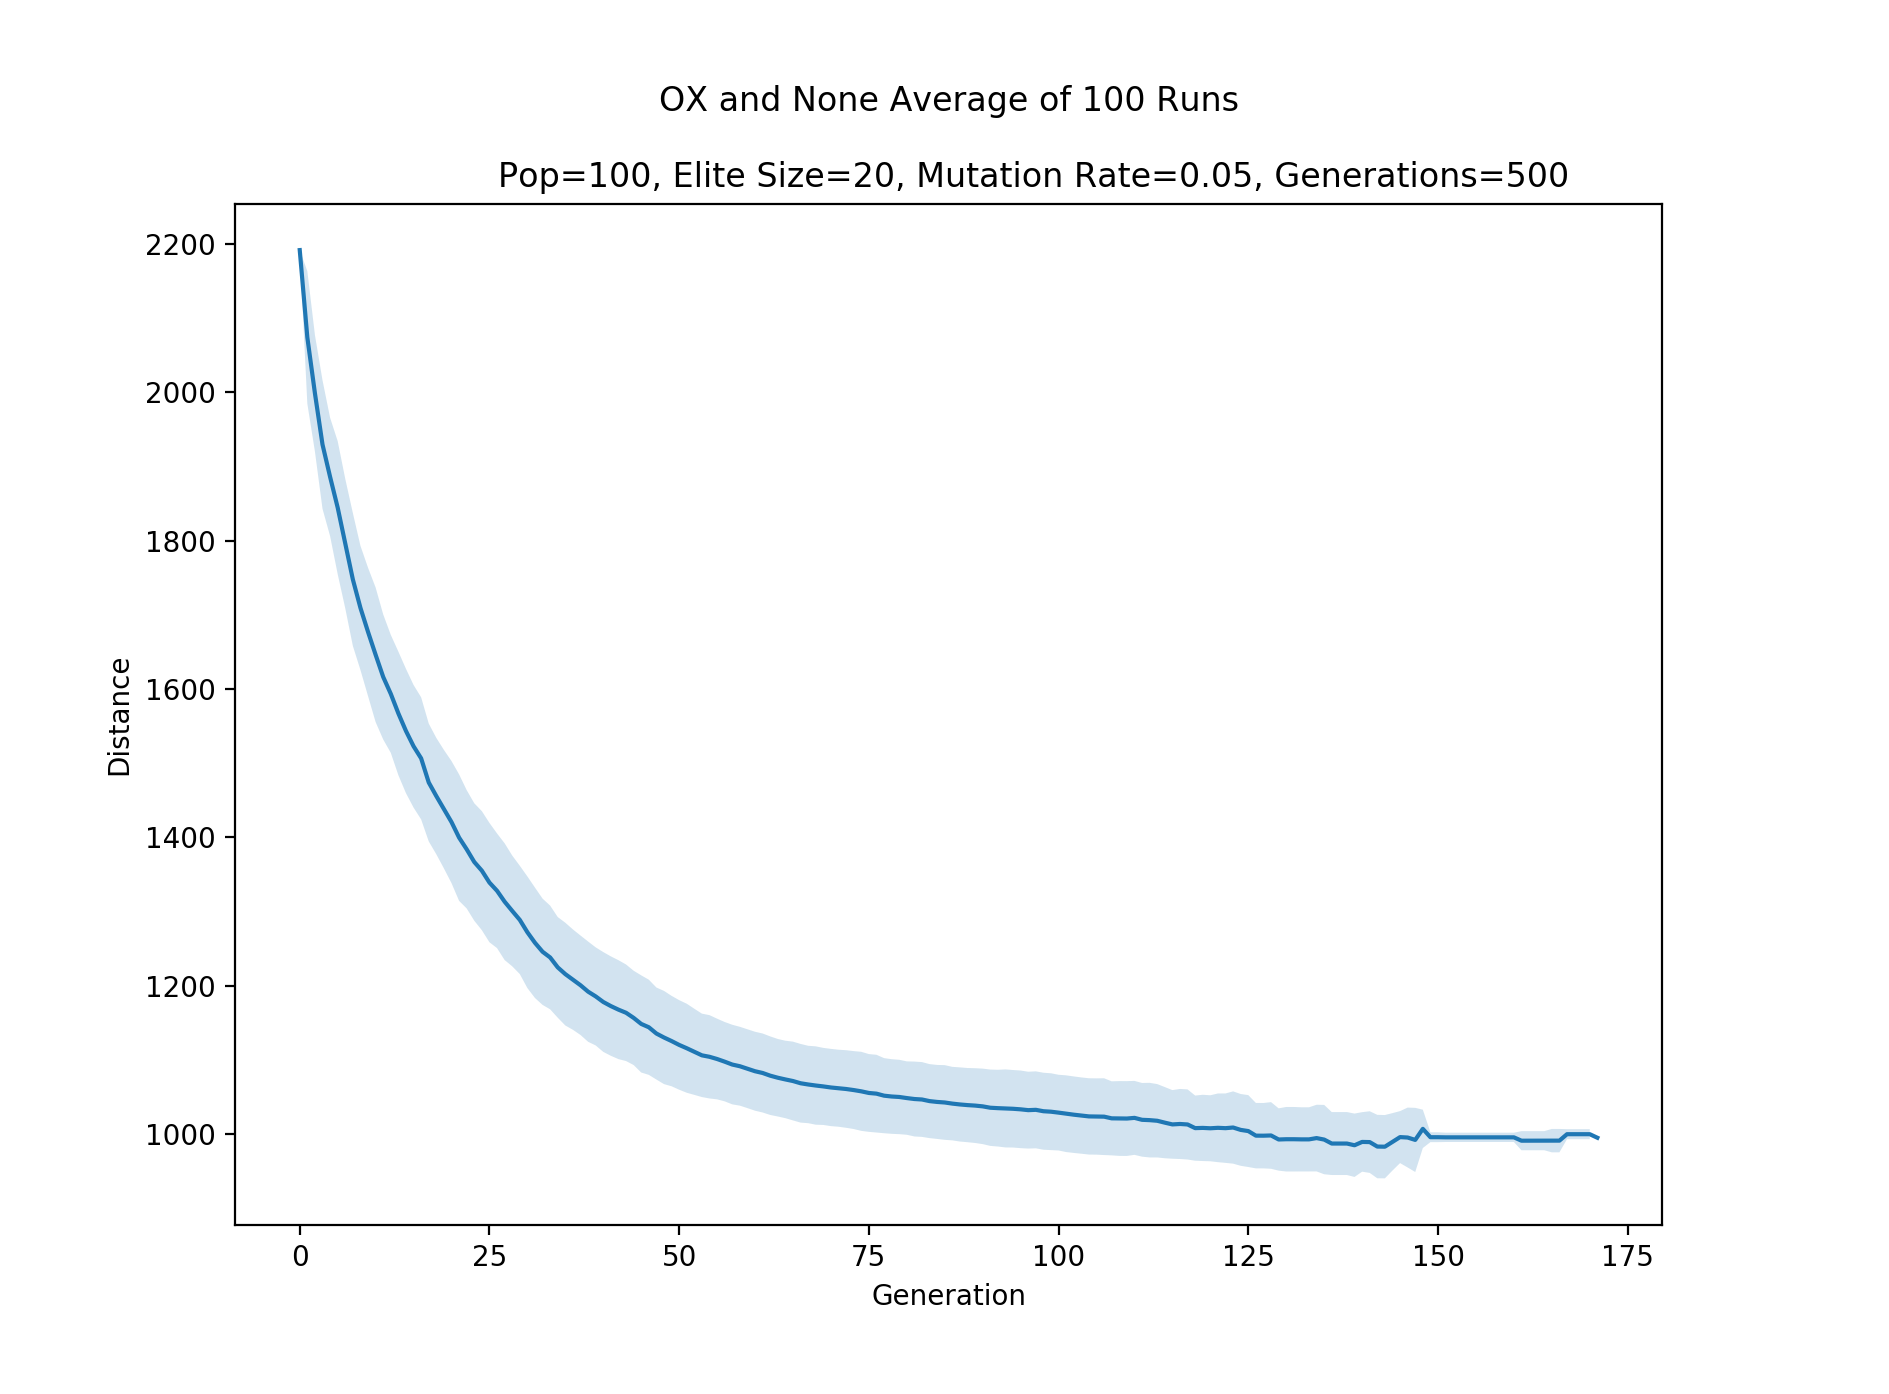

In [44]:
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 0, runs = 100)

In [46]:
#EX - Orange one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 1, mutationMethod = 0, runs = 100)

In [47]:
#OX - Green one
geneticAlgorithmPerformanceTest(pop, eSize, mRate, gens, childMethod = 2, mutationMethod = 0, runs = 100)

<IPython.core.display.Javascript object>


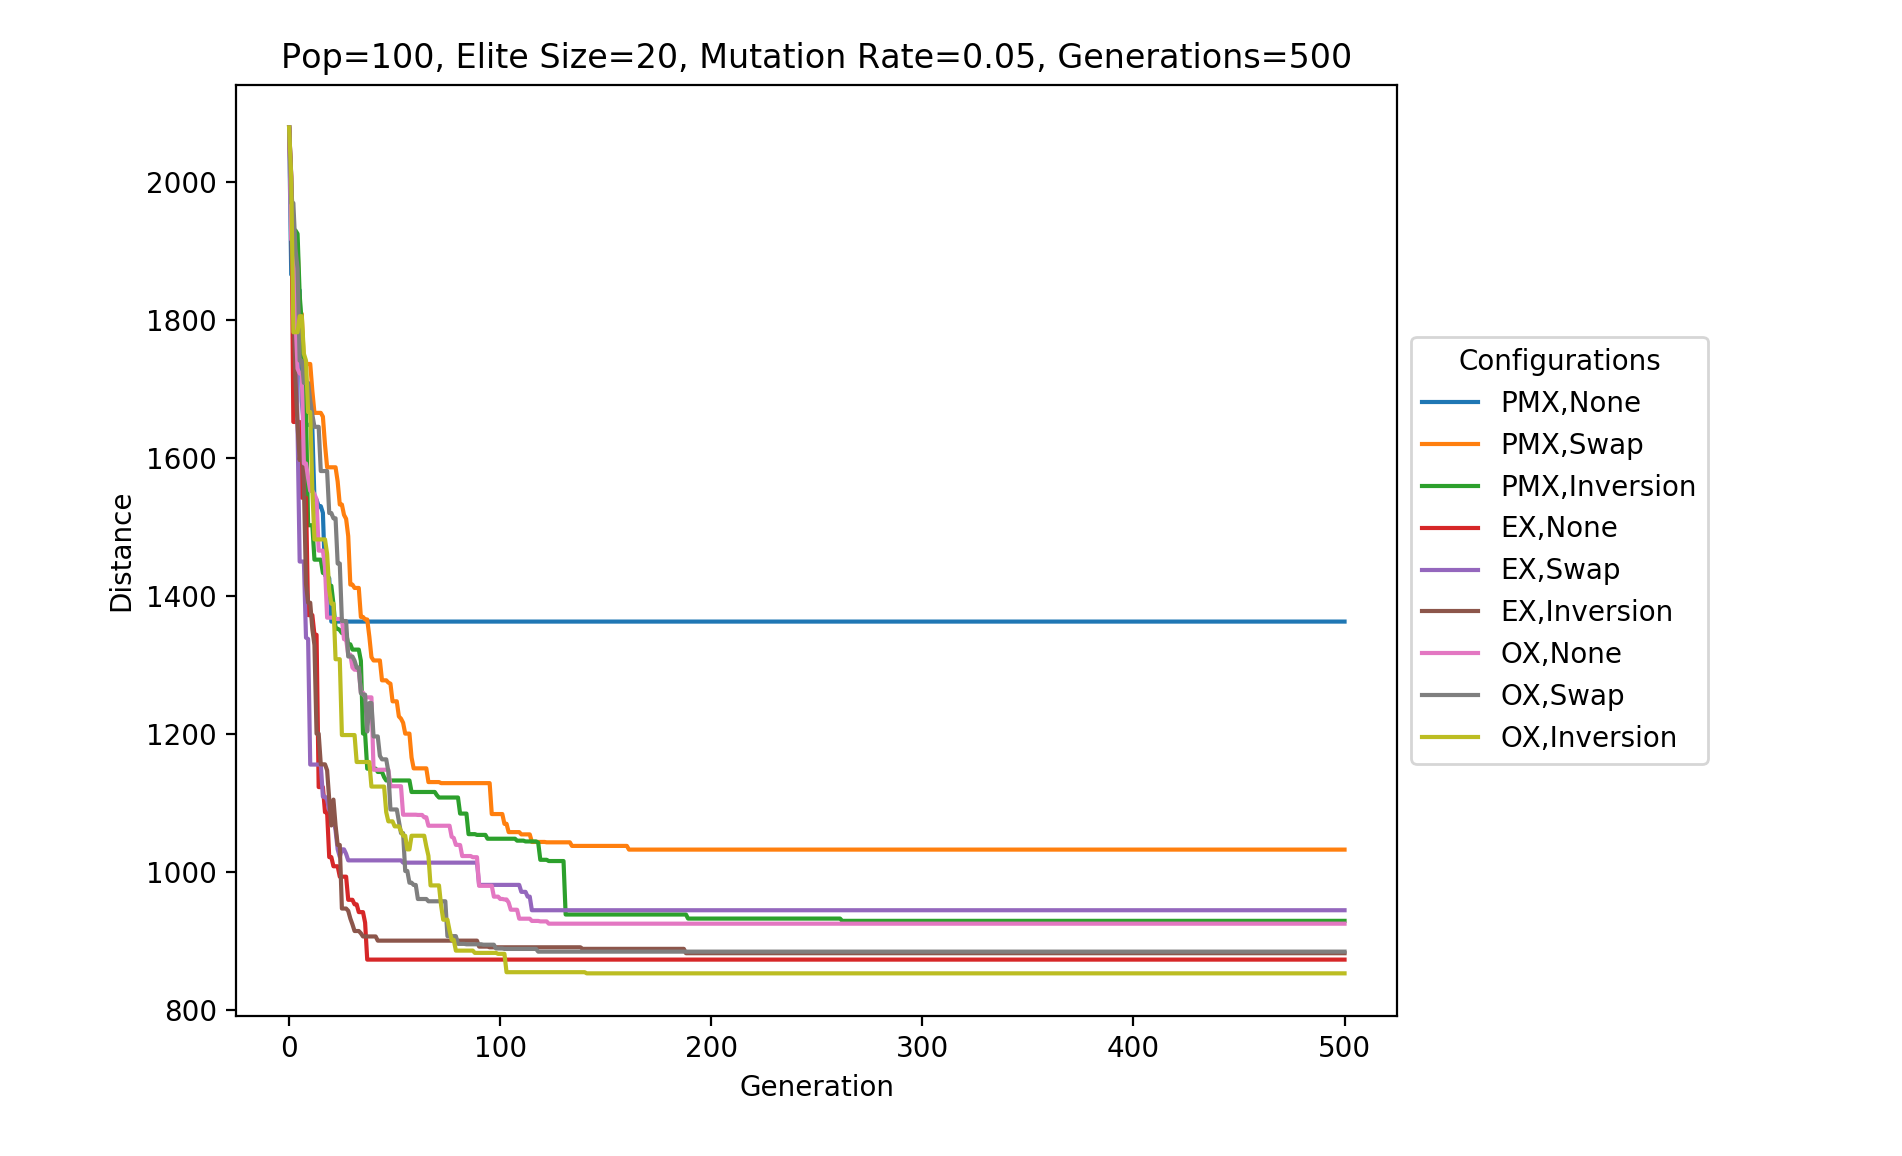

In [36]:
geneticAlgorithmComparisonPlot(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations,
                               childMethods = childMethods, mutationMethods = mutationMethods)

<IPython.core.display.Javascript object>


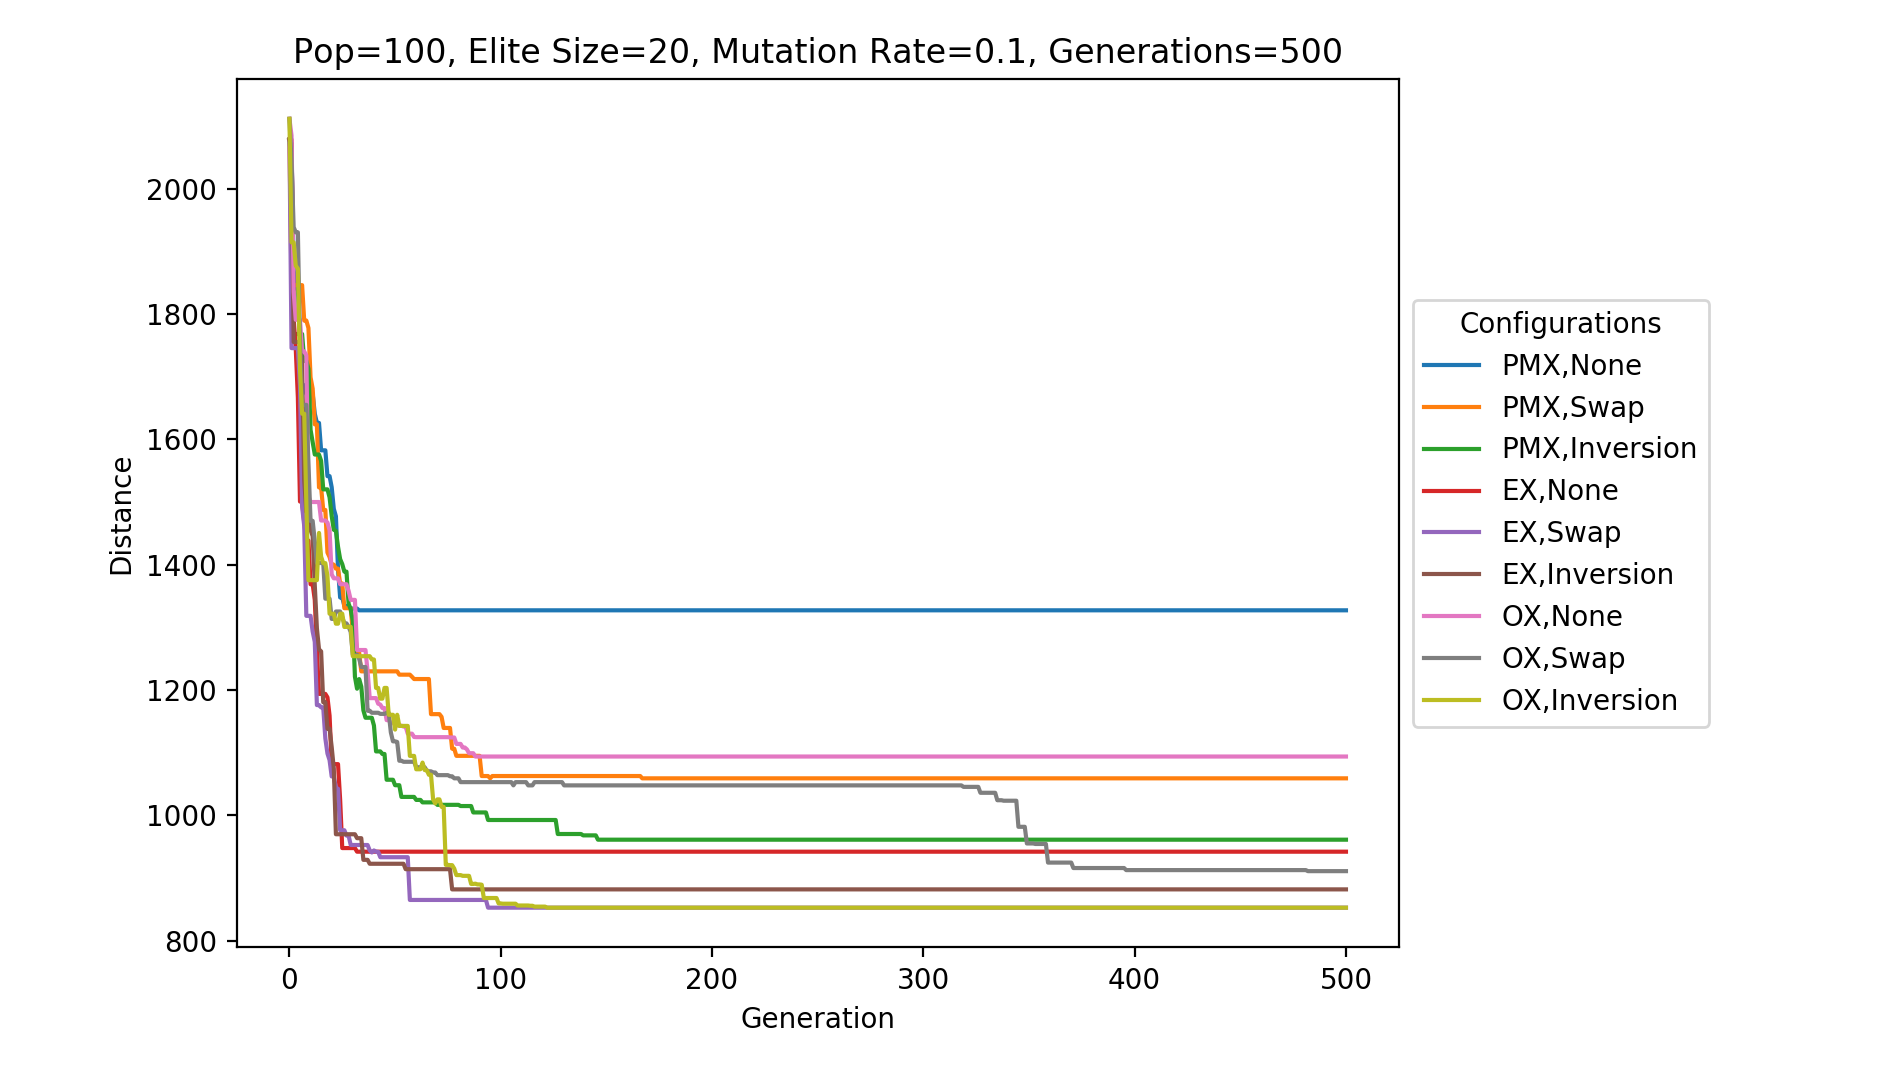

In [37]:
geneticAlgorithmComparisonPlot(population=pop, eliteSize=eliteSize, mutationRate=0.1, generations=generations,
                               childMethods = childMethods, mutationMethods = mutationMethods)

<IPython.core.display.Javascript object>


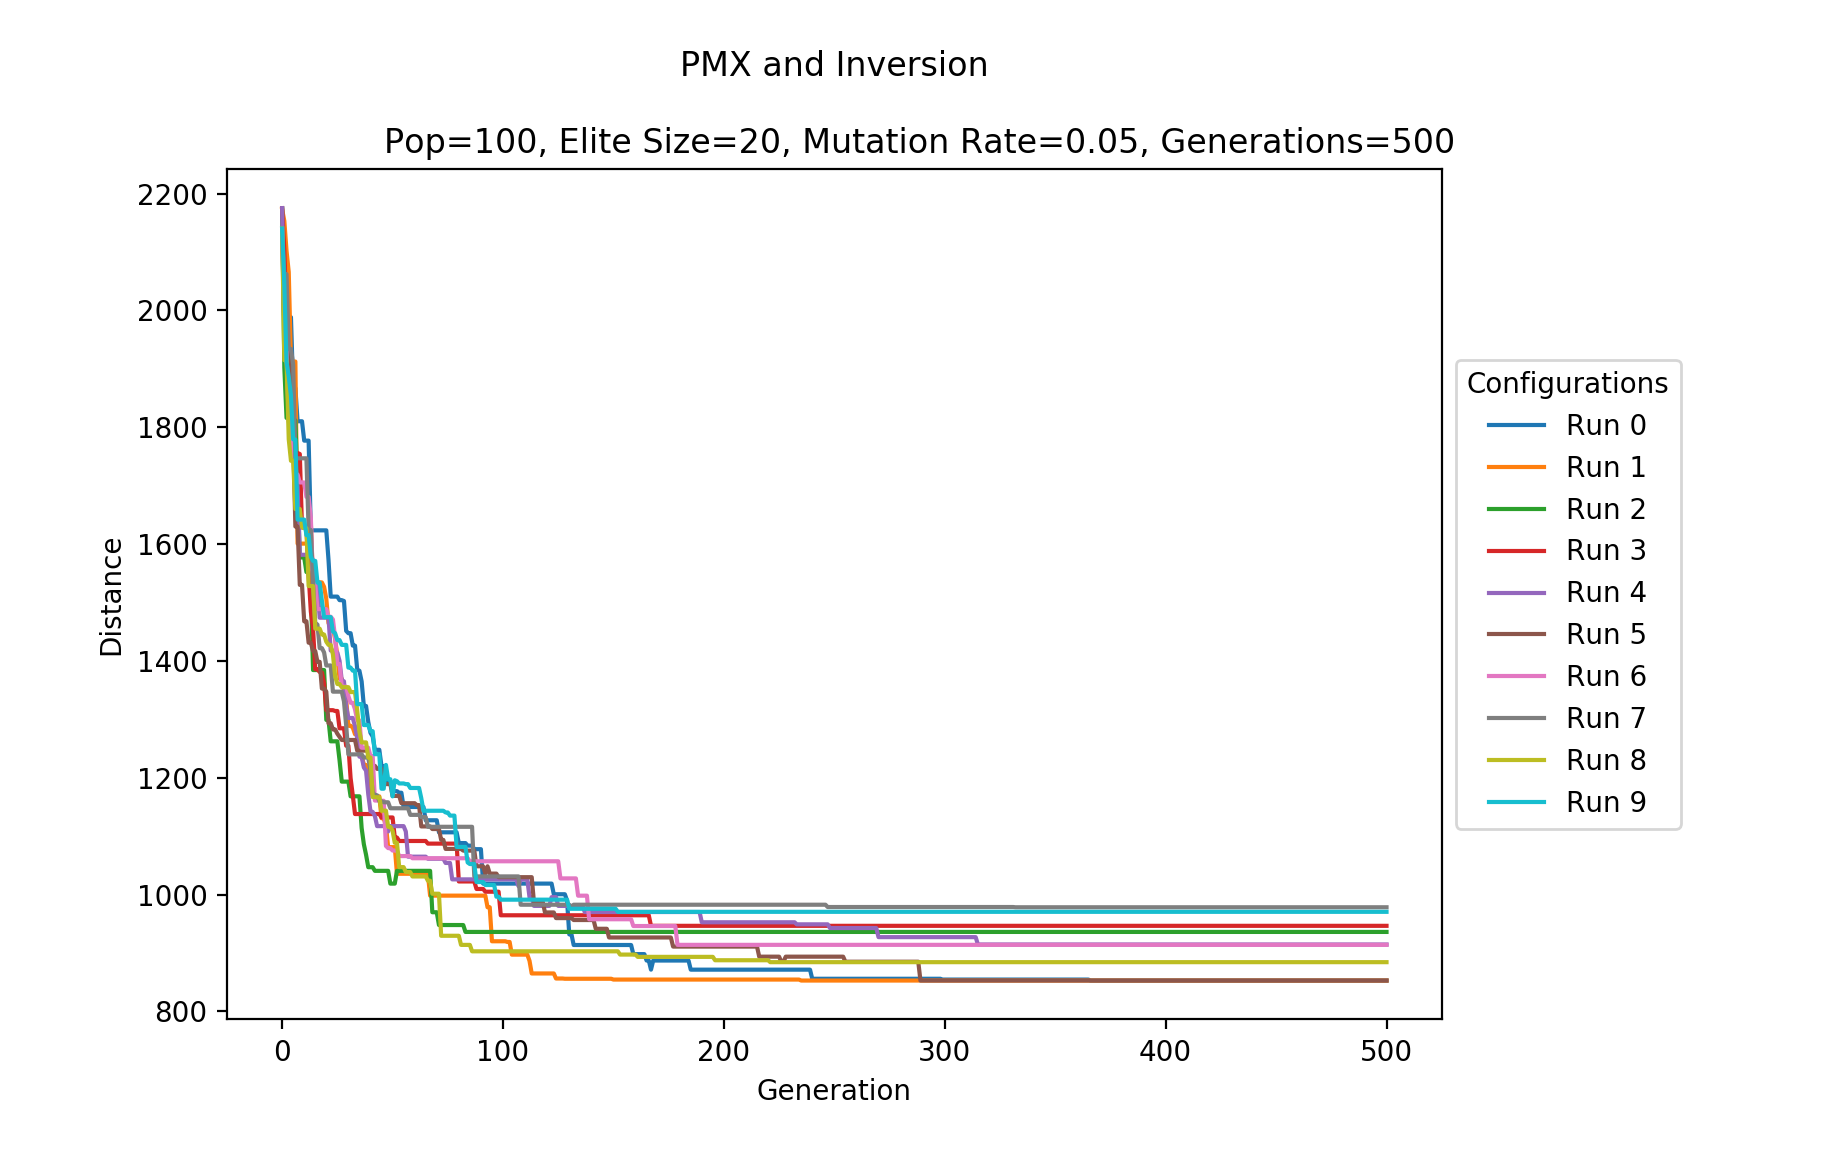

In [60]:
geneticAlgorithmVariationTest(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations, 
                              childMethod=0, mutationMethod=2, runs=10)

<IPython.core.display.Javascript object>


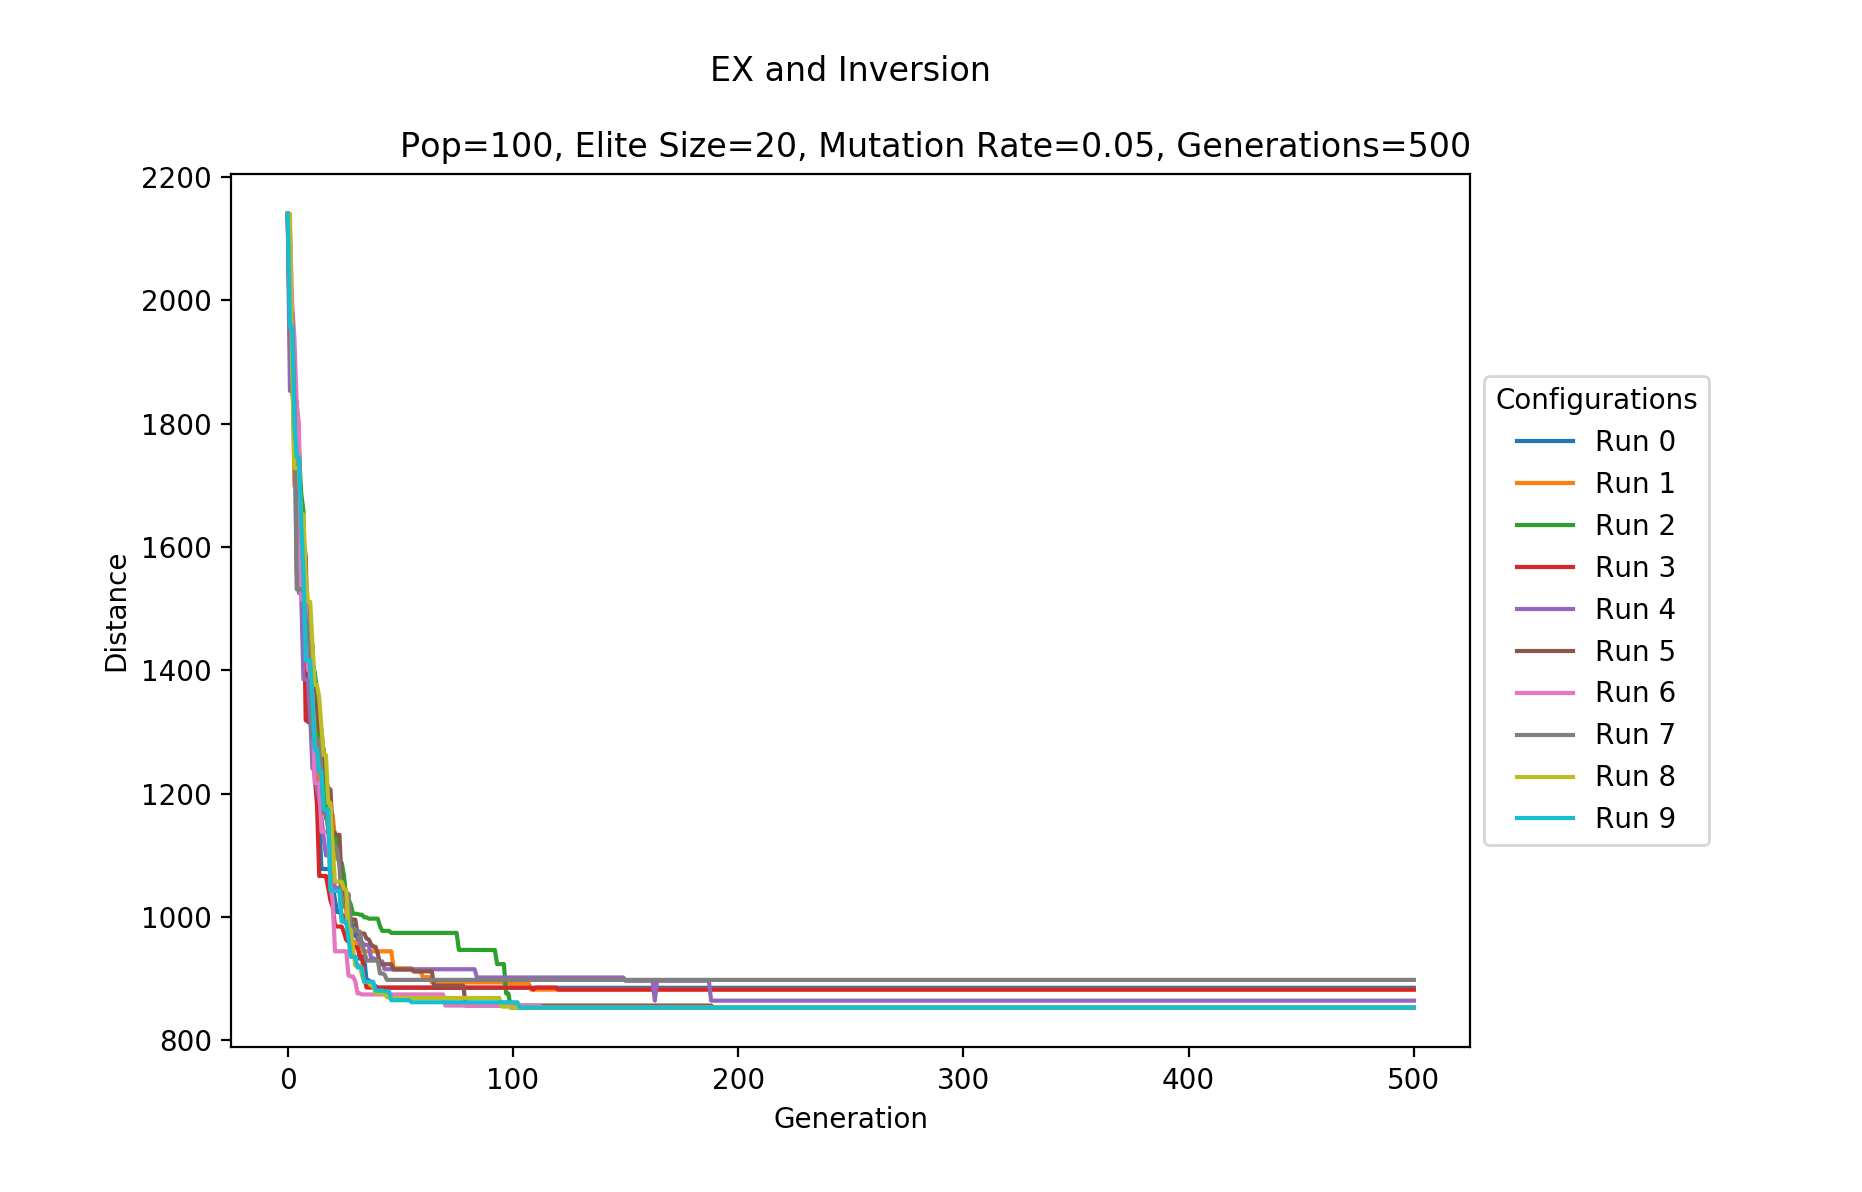

In [61]:
geneticAlgorithmVariationTest(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations, 
                              childMethod=1, mutationMethod=2, runs=10)

<IPython.core.display.Javascript object>


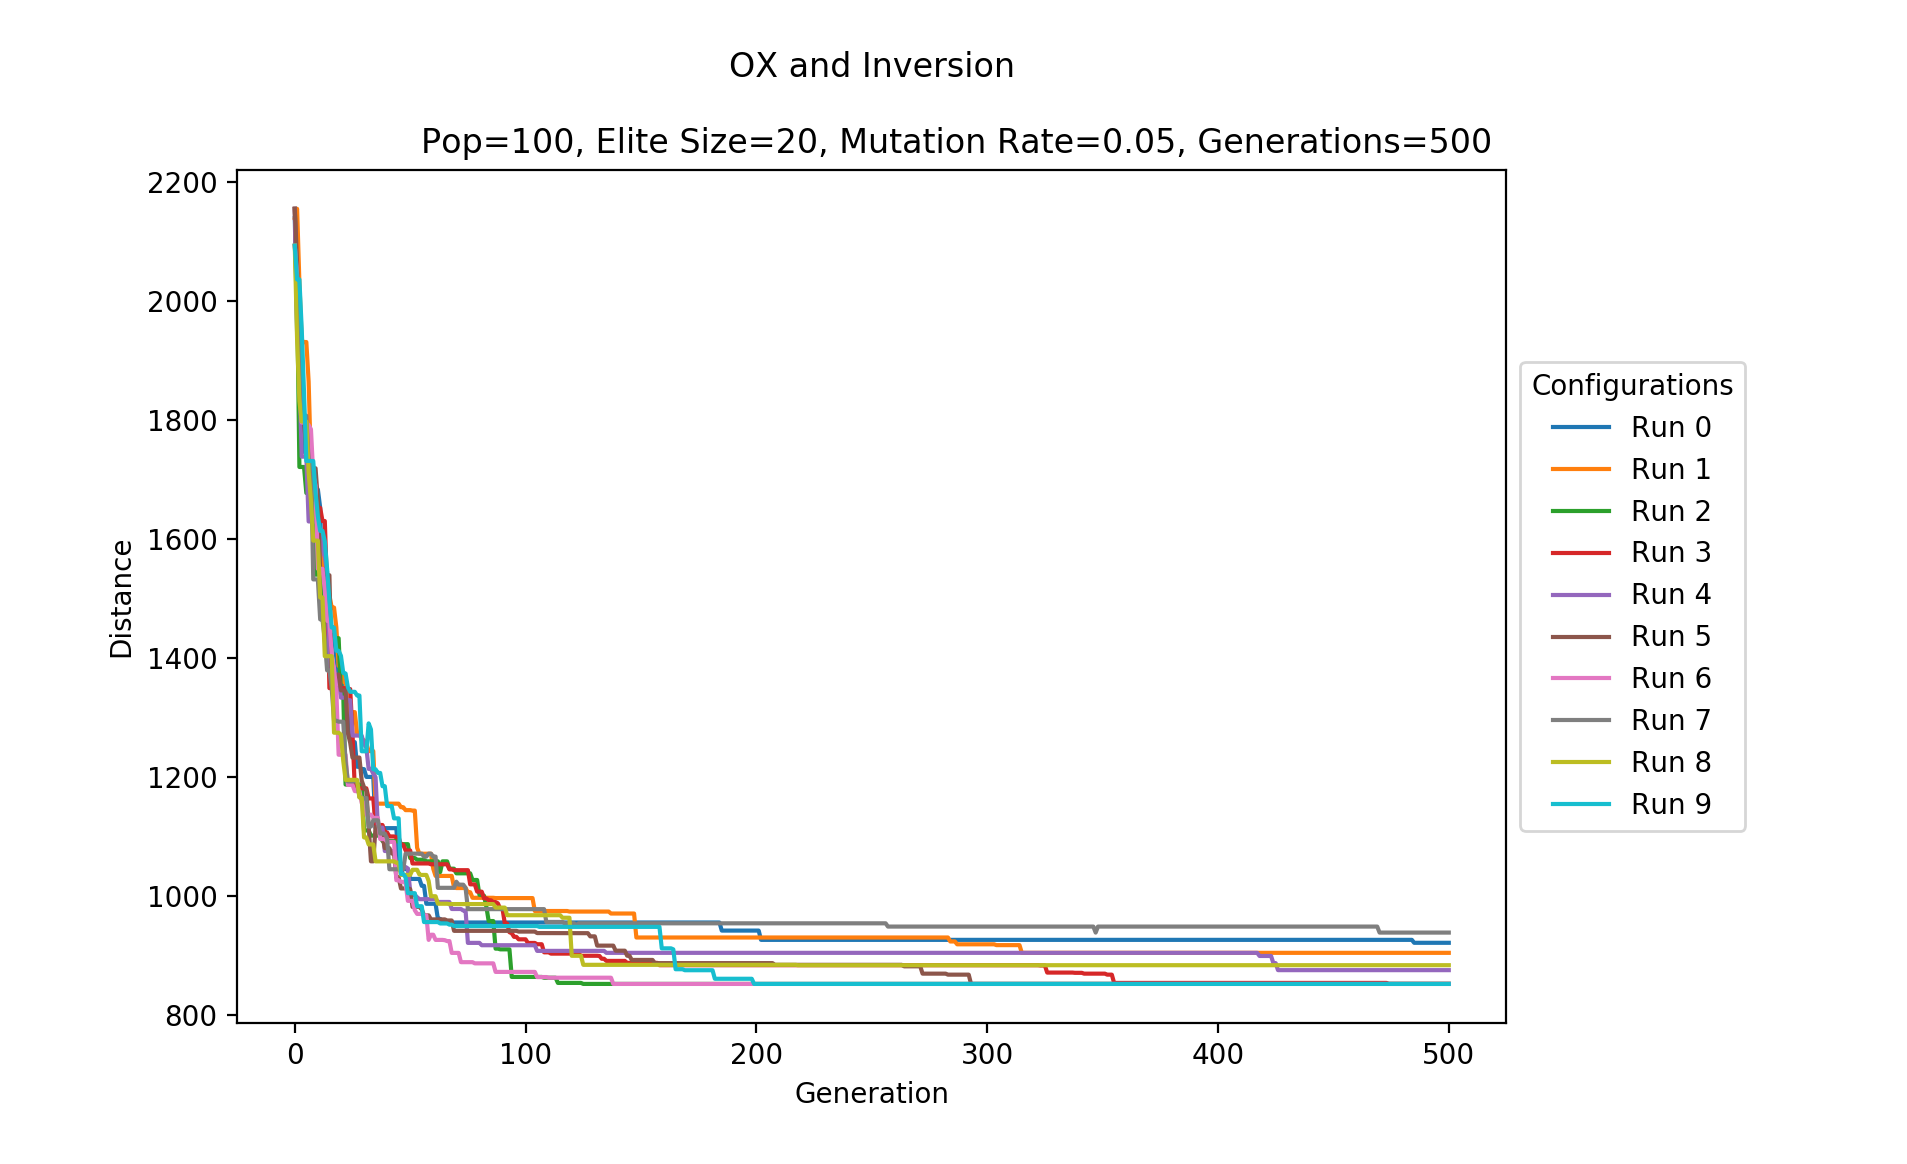

In [62]:
geneticAlgorithmVariationTest(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations, 
                              childMethod=2, mutationMethod=2, runs=10)

<IPython.core.display.Javascript object>


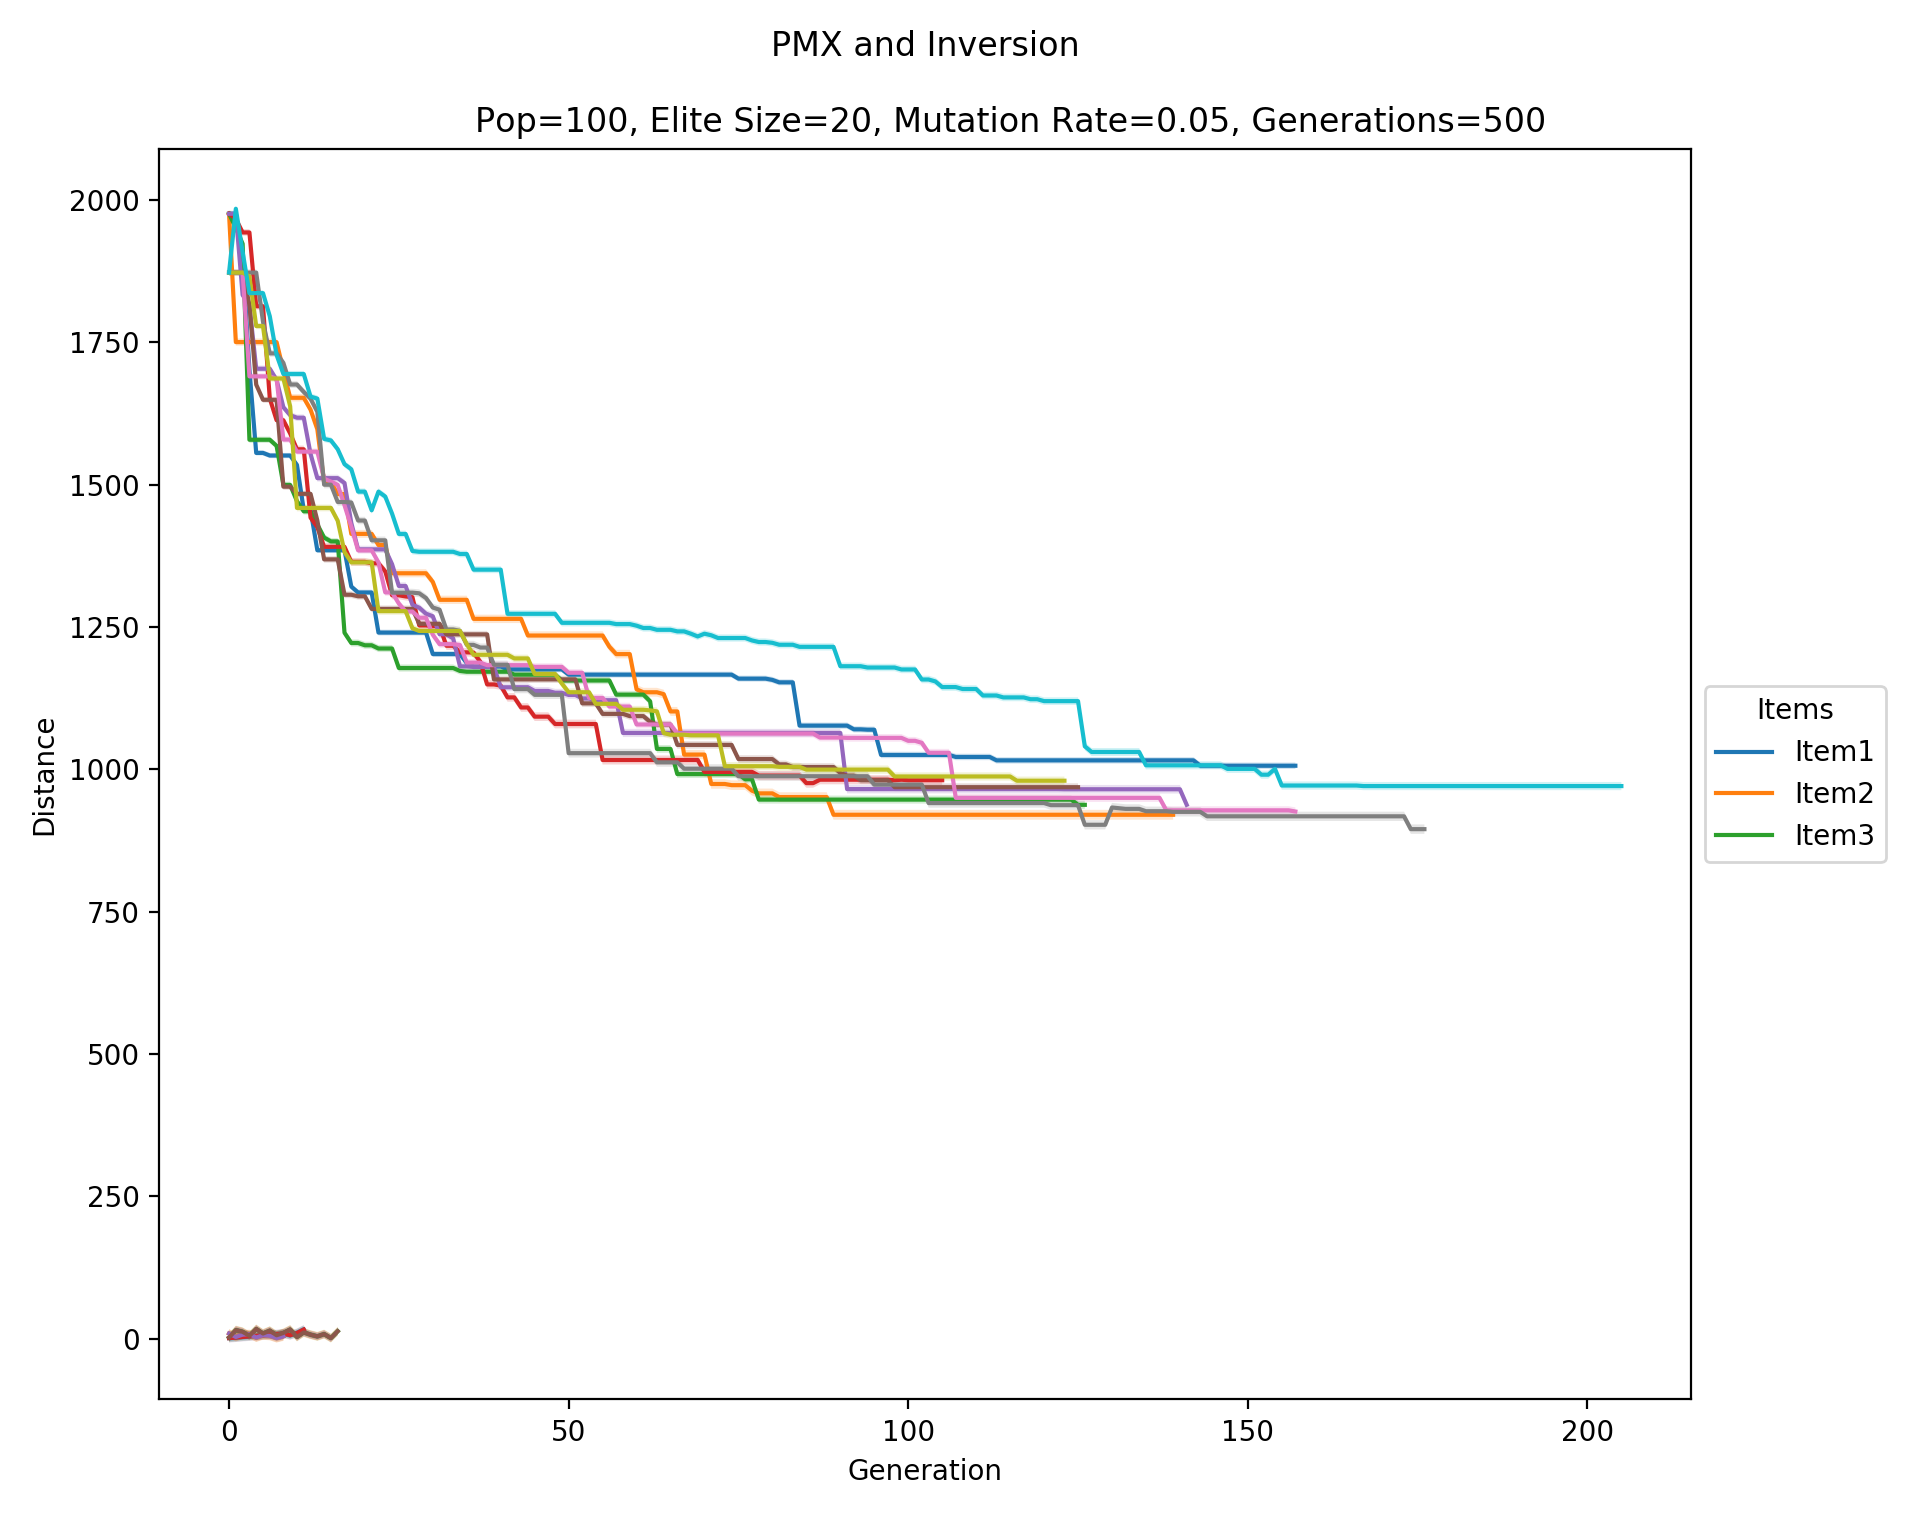

In [34]:
geneticAlgorithmVariationTest(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations, 
                              childMethod=0, mutationMethod=2, runs=10)

In [ ]:
geneticAlgorithmComparison(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations,
                               childMethods = childMethods, mutationMethods = mutationMethods)

In [ ]:
geneticAlgorithm(population=pop, eliteSize=eliteSize, mutationRate=mutationRate, generations=generations)

In [ ]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
geneticAlgorithmPlot(population=pop, eliteSize=20, mutationRate=0.01, generations=500)

In [ ]:
#Generate more data for the graph
#geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)
geneticAlgorithmPlot(population=pop, eliteSize=20, mutationRate=0.01, generations=500)